In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from IPython.display import display
plt.rc('font', family='Verdana')

import warnings
warnings.filterwarnings('ignore')

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
pd.set_option('display.max_columns', 60)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Загружаем данные

In [322]:
data = pd.read_csv("data/Credit_OTP.csv", encoding='cp1251', sep = ';')
data.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,OWN_AUTO,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,CREDIT,TERM,FST_PAYMENT,DL_DOCUMENT_FL,GPF_DOCUMENT_FL,FACT_LIVING_TERM,WORK_TIME,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,Торговля,Рабочий,Частная компания,Без участия,Вспомогательный техперсонал,от 10000 до 20000 руб.,5000,Оренбургская область,Оренбургская область,Оренбургская область,Оренбургская область,ПОВОЛЖСКИЙ,1,1,1,1,1,0,0,0,0,0,0,0,8000,6,8650,0,1,220,18.0000,0,0,1,1,1,6,2,1,1580,1580,nan
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,Торговля,Рабочий,Индивидуальный предприниматель,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,12000,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,1,1,1,1,0,0,0,0,0,0,0,0,21650,6,4000,0,1,137,97.0000,1,0,1,1,1,6,1,1,4020,4020,nan
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,Информационные технологии,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,9000,Иркутская область,Иркутская область,Иркутская область,Иркутская область,ВОСТОЧНО-СИБИРСКИЙ,1,1,1,1,1,0,0,0,1,0,0,0,33126,12,4000,0,1,251,84.0000,0,0,1,2,1,11,0,0,0,0,nan
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,Образование,Руководитель среднего звена,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,25000,Ростовская область,Ростовская область,Ростовская область,Ростовская область,ЮЖНЫЙ,0,1,0,0,1,1,0,0,0,0,0,0,"8491,82",6,5000,0,0,36,168.0000,1,1,1,1,1,6,3,1,"1589,923333",1590,nan
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,Государственная служба,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,12000,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,1,1,1,1,0,0,0,0,1,0,0,0,21990,12,4000,0,1,83,101.0000,1,0,1,2,1,16,2,1,"1152,15",2230,nan


In [323]:
def small_categories_aggregation(column, n_samples, value='Укрупненная категория', dataset=data):
    '''
    Укрупняет категории и числовые столбцы в датасете
    :param column: имя стоблца в датасете data
    :param n_samples: порог наблюдений, ниже которого категории объединяются в одну
    :param value: значение, которым будет заполнено
    :param dataset: датасет для изменения
    :return:
    '''

    tmp_small_columns = dataset[column].value_counts()[dataset[column].value_counts() < n_samples].index

    for col in tmp_small_columns:
        dataset.at[dataset[column] == col, column] = value
        
        
def show_columns_with_missing(dataset=data):
    '''
    показать столбцы, где есть пропущенные значения
    :param dataset: датасет
    :return:
    '''
    
    miss_columns = dataset.count(axis=0)[dataset.count(axis=0) < len(dataset)].index

    for i in miss_columns:
        print(dataset.isnull()[i].value_counts())
        print()

    display(miss_columns)
    

def columns(dataset=data):
    
    categorical_columns = [col for col in dataset.columns if dataset[col].dtype.name == 'object']
    numerical_columns = [col for col in dataset.columns if dataset[col].dtype.name != 'object']
    
    return categorical_columns, numerical_columns
    

cat_columns, num_columns = columns()
    
    
def show_binning(dataset=data, categorical_columns=cat_columns):

    columns_to_enlargment = []

    for column in categorical_columns:
        if dataset[column].value_counts().values[-1] < len(dataset)/100:
            columns_to_enlargment.append(column)
            print(dataset[column].value_counts())
            print()
            
    return columns_to_enlargment

In [324]:
# указано в условии
data['PREVIOUS_CARD_NUM_UTILIZED'] = data['PREVIOUS_CARD_NUM_UTILIZED'].replace(data['PREVIOUS_CARD_NUM_UTILIZED'][0], 0)

data.drop('AGREEMENT_RK', axis=1, inplace=True)

## Описание полей

In [325]:
pd.read_excel('data/Credit_OTP_columns_description.xls')

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,TARGET,целевая переменная:отклик на маркетинговую кам...
2,AGE,возраст клиента
3,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
4,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
5,GENDER,"пол клиента (1 - мужчина, 0 - женщина)"
6,CHILD_TOTAL,количество детей клиента
7,DEPENDANTS,количество иждивенцев клиента
8,EDUCATION,образование
9,MARITAL_STATUS,семейное положение


In [326]:
categorical_columns = ['TARGET', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'GENDER', 'EDUCATION', 'MARITAL_STATUS', 
                       'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR',
                       'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE',
                       'REGION_NM', 'REG_FACT_FL', 'FACT_POST_FL', 'REG_POST_FL', 'REG_FACT_POST_FL', 
                       'REG_FACT_POST_TP_FL', 'FL_PRESENCE_FL', 'AUTO_RUS_FL', 'HS_PRESENCE_FL',
                       'COT_PRESENCE_FL', 'GAR_PRESENCE_FL', 'LAND_PRESENCE_FL', 'DL_DOCUMENT_FL',
                       'GPF_DOCUMENT_FL', 'FACT_PHONE_FL', 'REG_PHONE_FL', 'GEN_PHONE_FL']

In [327]:
data.describe()

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,OWN_AUTO,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,TERM,DL_DOCUMENT_FL,GPF_DOCUMENT_FL,FACT_LIVING_TERM,WORK_TIME,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,PREVIOUS_CARD_NUM_UTILIZED
count,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000,13855.0000,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000
mean,0.1190,40.4061,0.9096,0.1345,0.6545,1.0994,0.6452,0.8385,0.9512,0.8864,0.8381,0.9053,0.3098,0.1163,0.0740,0.2157,0.0098,0.0192,0.0437,8.1010,0.0000,0.5886,3039.3396,292.2120,0.6116,0.0548,0.9101,1.3878,0.7519,7.8760,0.1954,0.1302,0.0191
std,0.3238,11.6011,0.2867,0.3412,0.4755,0.9954,0.8123,0.3680,0.2155,0.3174,0.3684,0.2928,0.4624,0.3208,0.2617,0.4113,0.0985,0.1374,0.2044,4.0941,0.0000,0.4921,262455.4365,24364.8324,0.4874,0.2276,0.2860,0.7936,0.9885,7.9557,0.6850,0.3557,0.1377
min,0.0000,21.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.0000,0.0000,0.0000,-26.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000
25%,0.0000,30.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.0000,0.0000,0.0000,41.0000,24.0000,0.0000,0.0000,1.0000,1.0000,0.0000,4.0000,0.0000,0.0000,0.0000
50%,0.0000,39.0000,1.0000,0.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.0000,0.0000,1.0000,108.0000,48.0000,1.0000,0.0000,1.0000,1.0000,0.0000,5.0000,0.0000,0.0000,0.0000
75%,0.0000,50.0000,1.0000,0.0000,1.0000,2.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,10.0000,0.0000,1.0000,204.0000,110.0000,1.0000,0.0000,1.0000,2.0000,1.0000,8.0000,0.0000,0.0000,0.0000
max,1.0000,67.0000,1.0000,1.0000,1.0000,10.0000,7.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.0000,1.0000,1.0000,1.0000,1.0000,1.0000,36.0000,0.0000,1.0000,28101997.0000,2867959.0000,1.0000,1.0000,1.0000,11.0000,11.0000,114.0000,13.0000,8.0000,2.0000


# Обрабатываем пропущенные значения

In [328]:
for i in data.columns:
    print(i)
    print(data[i].unique())
    print()

TARGET
[0 1]

AGE
[49 32 52 39 30 29 35 41 53 43 54 26 62 45 38 65 34 28 37 42 33 27 31 40 63
 61 44 59 48 24 23 47 58 51 56 22 36 57 50 46 55 66 25 60 64 21 67]

SOCSTATUS_WORK_FL
[1 0]

SOCSTATUS_PENS_FL
[0 1]

GENDER
[1 0]

CHILD_TOTAL
[ 2  3  4  1  0  5  6  7  8 10]

DEPENDANTS
[1 3 0 2 4 5 6 7]

EDUCATION
['Среднее специальное' 'Среднее' 'Неполное среднее' 'Высшее'
 'Неоконченное высшее' 'Два и более высших образования' 'Ученая степень']

MARITAL_STATUS
['Состою в браке' 'Гражданский брак' 'Разведен(а)' 'Не состоял в браке'
 'Вдовец/Вдова']

GEN_INDUSTRY
['Торговля' 'Информационные технологии' 'Образование'
 'Государственная служба' 'Другие сферы' 'Сельское хозяйство'
 'Здравоохранение' 'Металлургия/Промышленность/Машиностроение' nan
 'Коммунальное хоз-во/Дорожные службы' 'Строительство' 'Транспорт'
 'Банк/Финансы' 'Ресторанный бизнес/Общественное питание' 'Страхование'
 'Нефтегазовая промышленность' 'СМИ/Реклама/PR-агенства' 'Энергетика'
 'Салоны красоты и здоровья' 'ЧОП/Детектив

In [329]:
# одно уникальное значение
data.drop('DL_DOCUMENT_FL', axis=1, inplace=True)

In [330]:
show_columns_with_missing()

False    13856
True      1367
Name: GEN_INDUSTRY, dtype: int64

False    13856
True      1367
Name: GEN_TITLE, dtype: int64

False    13856
True      1367
Name: ORG_TP_STATE, dtype: int64

False    13858
True      1365
Name: ORG_TP_FCAPITAL, dtype: int64

False    13856
True      1367
Name: JOB_DIR, dtype: int64

False    14928
True       295
Name: TP_PROVINCE, dtype: int64

False    15222
True         1
Name: REGION_NM, dtype: int64

False    13855
True      1368
Name: WORK_TIME, dtype: int64



Index(['GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL',
       'JOB_DIR', 'TP_PROVINCE', 'REGION_NM', 'WORK_TIME'],
      dtype='object')

In [331]:
for i in categorical_columns:
    if i in data.columns:
        data[i]=data[i].astype('str')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 50 columns):
TARGET                        15223 non-null object
AGE                           15223 non-null int64
SOCSTATUS_WORK_FL             15223 non-null object
SOCSTATUS_PENS_FL             15223 non-null object
GENDER                        15223 non-null object
CHILD_TOTAL                   15223 non-null int64
DEPENDANTS                    15223 non-null int64
EDUCATION                     15223 non-null object
MARITAL_STATUS                15223 non-null object
GEN_INDUSTRY                  15223 non-null object
GEN_TITLE                     15223 non-null object
ORG_TP_STATE                  15223 non-null object
ORG_TP_FCAPITAL               15223 non-null object
JOB_DIR                       15223 non-null object
FAMILY_INCOME                 15223 non-null object
PERSONAL_INCOME               15223 non-null object
REG_ADDRESS_PROVINCE          15223 non-null object
FACT_ADDRE

In [332]:
show_columns_with_missing()

False    13855
True      1368
Name: WORK_TIME, dtype: int64



Index(['WORK_TIME'], dtype='object')

In [333]:
data.head(20)

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,OWN_AUTO,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,CREDIT,TERM,FST_PAYMENT,GPF_DOCUMENT_FL,FACT_LIVING_TERM,WORK_TIME,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,Торговля,Рабочий,Частная компания,Без участия,Вспомогательный техперсонал,от 10000 до 20000 руб.,5000,Оренбургская область,Оренбургская область,Оренбургская область,Оренбургская область,ПОВОЛЖСКИЙ,1,1,1,1,1,0,0,0,0,0,0,0,8000,6,8650,1,220,18.0000,0,0,1,1,1,6,2,1,1580,1580,0.0000
1,0,32,1,0,1,3,3,Среднее,Состою в браке,Торговля,Рабочий,Индивидуальный предприниматель,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,12000,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,1,1,1,1,0,0,0,0,0,0,0,0,21650,6,4000,1,137,97.0000,1,0,1,1,1,6,1,1,4020,4020,0.0000
2,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,Информационные технологии,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,9000,Иркутская область,Иркутская область,Иркутская область,Иркутская область,ВОСТОЧНО-СИБИРСКИЙ,1,1,1,1,1,0,0,0,1,0,0,0,33126,12,4000,1,251,84.0000,0,0,1,2,1,11,0,0,0,0,0.0000
3,0,39,1,0,1,1,1,Высшее,Состою в браке,Образование,Руководитель среднего звена,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,25000,Ростовская область,Ростовская область,Ростовская область,Ростовская область,ЮЖНЫЙ,0,1,0,0,1,1,0,0,0,0,0,0,"8491,82",6,5000,0,36,168.0000,1,1,1,1,1,6,3,1,"1589,923333",1590,0.0000
4,0,30,1,0,0,0,0,Среднее,Состою в браке,Государственная служба,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,12000,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,1,1,1,1,0,0,0,0,1,0,0,0,21990,12,4000,1,83,101.0000,1,0,1,2,1,16,2,1,"1152,15",2230,0.0000
5,0,29,1,0,0,0,0,Среднее,Гражданский брак,Торговля,Специалист,Частная компания,Без участия,Адм-хоз. и трансп. службы,от 20000 до 50000 руб.,12000,Белгородская область,Белгородская область,Белгородская область,Белгородская область,ЦЕНТРАЛЬНЫЙ 1,1,1,1,1,1,0,1,0,0,0,0,0,30615,12,3500,0,108,40.0000,1,0,1,2,1,11,0,0,0,0,0.0000
6,0,35,1,0,0,1,1,Высшее,Разведен(а),Другие сферы,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,15000,Вологодская область,Вологодская область,Вологодская область,Вологодская область,ЦЕНТРАЛЬНЫЙ 2,1,1,1,1,1,1,0,0,0,0,0,0,10450,3,15000,1,48,6.0000,0,0,1,2,2,14,0,0,0,0,0.0000
7,0,41,1,0,1,0,0,Среднее,Состою в браке,Сельское хозяйство,Рабочий,Частная компания,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,6000,Волгоградская область,Волгоградская область,Волгоградская область,Волгоградская область,ЮЖНЫЙ,1,1,1,1,1,1,0,0,0,0,0,0,15035,10,465,1,204,6.0000,1,1,1,2,1,11,0,0,0,0,0.0000
8,0,53,1,0,0,2,0,Высшее,Состою в браке,Здравоохранение,Руководитель высшего звена,Частная компания,Без участия,Участие в основ. деятельности,свыше 50000 руб.,100000,Ярославская область,Ярославская область,Ярославская область,Ярославская область,ЦЕНТРАЛЬНЫЙ 2,1,1,1,1,1,0,0,0,0,0,0,0,"32914,31",4,"29080,92",0,228,156.0000,1,0,1,1,1,3,0,0,0,0,0.0000
9,0,43,1,0,1,0,0,Среднее специальное,Состою в браке,Образование,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,7000,Краснодарский край,Краснодарский край,Краснодарский край,Краснодарский край,ЮЖНЫ

In [334]:
data.at[(data['GEN_INDUSTRY'] == 'nan') & (data['GEN_TITLE'] == 'nan'), 'WORK_TIME'] = 0

In [335]:
show_columns_with_missing()

False    15222
True         1
Name: WORK_TIME, dtype: int64



Index(['WORK_TIME'], dtype='object')

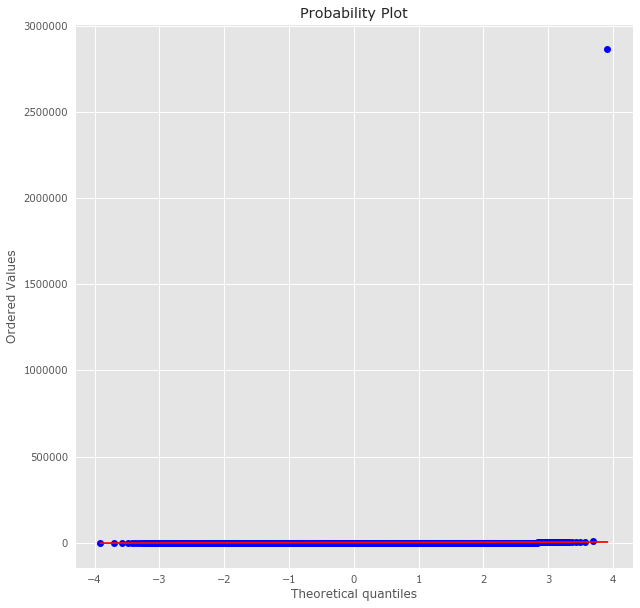

In [336]:
## QQ Plot
plt.subplots(figsize=(10, 10))

stats.probplot(data['WORK_TIME'].dropna().sort_values(), dist="norm", plot=plt)
plt.show()

In [337]:
heu_const_work_time = 15200

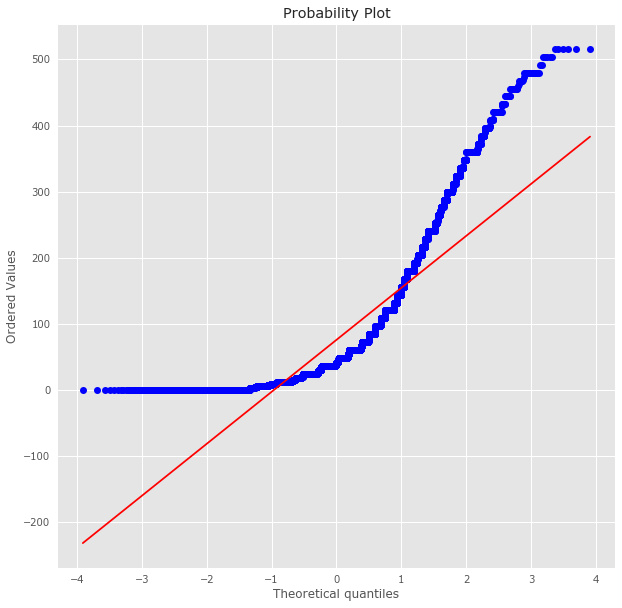

In [338]:
plt.subplots(figsize=(10, 10))

stats.probplot((data['WORK_TIME'].dropna().sort_values()[:heu_const_work_time]), dist="norm", plot=plt)
plt.show()

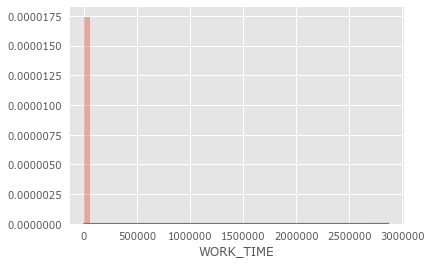

In [339]:
sns.distplot(data['WORK_TIME'].dropna().sort_values().dropna())

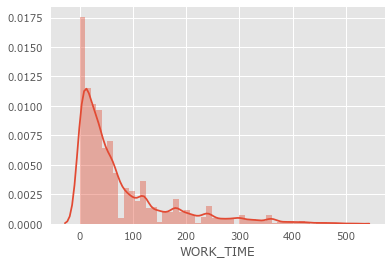

In [340]:
sns.distplot(data['WORK_TIME'].dropna().sort_values()[:heu_const_work_time].dropna())

In [341]:
maxy = max(data['WORK_TIME'].dropna().sort_values()[:heu_const_work_time])

In [342]:
max(data['WORK_TIME'].dropna().sort_values()[:heu_const_work_time])

516.0

In [343]:
data['WORK_TIME'].dropna().sort_values()[:heu_const_work_time].mean()

75.5520394736842

In [344]:
data['WORK_TIME'].dropna().sort_values()[:heu_const_work_time].median()

40.0

In [345]:
len(data['WORK_TIME'].dropna())

15222

In [346]:
data.at[data['WORK_TIME'] > maxy, 'WORK_TIME'] = np.NaN
len(data['WORK_TIME'].dropna())
# стало не слишком больше пропущенных значений

15201

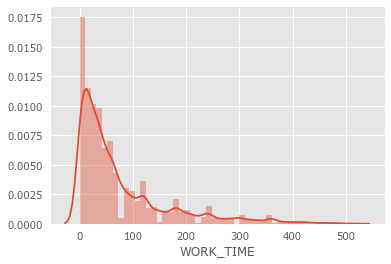

In [347]:
sns.distplot(data['WORK_TIME'].fillna(data['WORK_TIME'].dropna().median()))

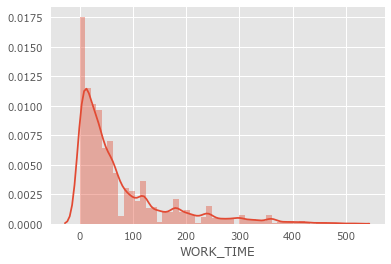

In [348]:
sns.distplot(data['WORK_TIME'].fillna(data['WORK_TIME'].dropna().mean()))

In [349]:
data[data['WORK_TIME'] != 0].head()

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,OWN_AUTO,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,CREDIT,TERM,FST_PAYMENT,GPF_DOCUMENT_FL,FACT_LIVING_TERM,WORK_TIME,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,Торговля,Рабочий,Частная компания,Без участия,Вспомогательный техперсонал,от 10000 до 20000 руб.,5000,Оренбургская область,Оренбургская область,Оренбургская область,Оренбургская область,ПОВОЛЖСКИЙ,1,1,1,1,1,0,0,0,0,0,0,0,8000,6,8650,1,220,18.0000,0,0,1,1,1,6,2,1,1580,1580,0.0000
1,0,32,1,0,1,3,3,Среднее,Состою в браке,Торговля,Рабочий,Индивидуальный предприниматель,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,12000,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,1,1,1,1,0,0,0,0,0,0,0,0,21650,6,4000,1,137,97.0000,1,0,1,1,1,6,1,1,4020,4020,0.0000
2,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,Информационные технологии,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,9000,Иркутская область,Иркутская область,Иркутская область,Иркутская область,ВОСТОЧНО-СИБИРСКИЙ,1,1,1,1,1,0,0,0,1,0,0,0,33126,12,4000,1,251,84.0000,0,0,1,2,1,11,0,0,0,0,0.0000
3,0,39,1,0,1,1,1,Высшее,Состою в браке,Образование,Руководитель среднего звена,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,25000,Ростовская область,Ростовская область,Ростовская область,Ростовская область,ЮЖНЫЙ,0,1,0,0,1,1,0,0,0,0,0,0,"8491,82",6,5000,0,36,168.0000,1,1,1,1,1,6,3,1,"1589,923333",1590,0.0000
4,0,30,1,0,0,0,0,Среднее,Состою в браке,Государственная служба,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,12000,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,1,1,1,1,0,0,0,0,1,0,0,0,21990,12,4000,1,83,101.0000,1,0,1,2,1,16,2,1,"1152,15",2230,0.0000


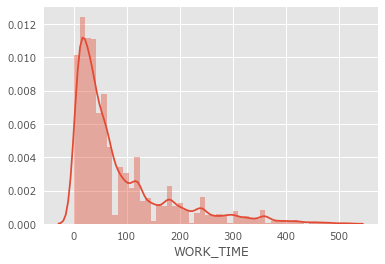

In [350]:
sns.distplot(data[data['WORK_TIME'] != 0]['WORK_TIME'].dropna())

In [351]:
data[data['WORK_TIME'] != 0]['WORK_TIME'].dropna().sort_values()[:heu_const_work_time].mean()

83.04951568599104

In [352]:
data[data['WORK_TIME'] != 0]['WORK_TIME'].dropna().sort_values()[:heu_const_work_time].median()

48.0

mean


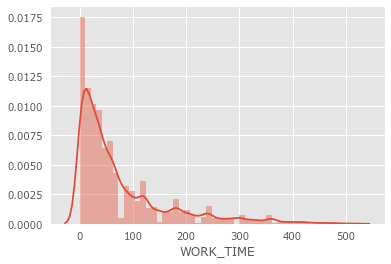

In [353]:
print('mean')
sns.distplot(data['WORK_TIME'].fillna(data[data['WORK_TIME'] != 0]['WORK_TIME'].dropna().sort_values()[:heu_const_work_time].mean()))

median


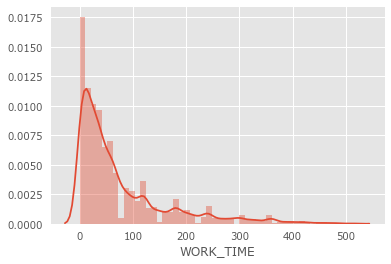

In [354]:
print('median')
sns.distplot(data['WORK_TIME'].fillna(data[data['WORK_TIME'] != 0]['WORK_TIME'].dropna().sort_values()[:heu_const_work_time].median()))

In [355]:
true_median = data[data['WORK_TIME'] != 0]['WORK_TIME'].dropna().sort_values()[:heu_const_work_time].median()
data['WORK_TIME'].fillna(true_median, inplace=True)

# Вывод
Для неработающих людей WORK_TIME заменили на ноль, было выявлено, что есть "неправильные" значения, то есть нельзя отработать 300 000 месяцев. Порог этих значений я определил по qq plot и выявил значение, больше которого значения считать правдивыми нельзя. Затем я заменил эти значения на пропуски и импутировал пропуски медианным значением WORK_TIME без учета 0 (неработающих) людей

In [356]:
show_columns_with_missing()

Index([], dtype='object')

# Преобразуем численные значения

In [357]:
for i in ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']:
    if i in data.columns:
        data[i] = data[i].str.replace(',', '.').astype('float')

In [358]:
# cat_columns = [col for col in data.columns if data[col].dtype.name == 'object']
# num_columns = [col for col in data.columns if data[col].dtype.name != 'object']
cat_columns, num_columns = columns()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 50 columns):
TARGET                        15223 non-null object
AGE                           15223 non-null int64
SOCSTATUS_WORK_FL             15223 non-null object
SOCSTATUS_PENS_FL             15223 non-null object
GENDER                        15223 non-null object
CHILD_TOTAL                   15223 non-null int64
DEPENDANTS                    15223 non-null int64
EDUCATION                     15223 non-null object
MARITAL_STATUS                15223 non-null object
GEN_INDUSTRY                  15223 non-null object
GEN_TITLE                     15223 non-null object
ORG_TP_STATE                  15223 non-null object
ORG_TP_FCAPITAL               15223 non-null object
JOB_DIR                       15223 non-null object
FAMILY_INCOME                 15223 non-null object
PERSONAL_INCOME               15223 non-null float64
REG_ADDRESS_PROVINCE          15223 non-null object
FACT_ADDR

In [359]:
data[cat_columns].describe()

,TARGET,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,GPF_DOCUMENT_FL,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL
count,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223
unique,2,2,2,2,7,5,32,13,6,3,11,5,81,81,80,71,12,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,0,1,0,1,Среднее специальное,Состою в браке,Торговля,Специалист,Частная компания,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,Кемеровская область,Кемеровская область,Кемеровская область,Краснодарский край,ЮЖНЫЙ,1,1,1,1,1,0,0,0,0,0,0,1,1,0,1
freq,13411,13847,13176,9964,6518,9416,2385,7010,6523,13688,11452,7077,674,674,674,790,2179,12765,14480,13493,12758,13782,10507,14097,11940,15074,14930,14558,8961,9311,14389,13855


In [360]:
data[num_columns].describe()

,AGE,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,OWN_AUTO,CREDIT,TERM,FST_PAYMENT,FACT_LIVING_TERM,WORK_TIME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
count,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000,15223.0000
mean,40.4061,1.0994,0.6452,13853.8363,0.1163,14667.9593,8.1010,3398.5627,3039.3396,75.5412,1.3878,0.7519,7.8760,0.1954,0.1302,239.4571,243.0216,0.0191
std,11.6011,0.9954,0.8123,9015.4676,0.3208,12147.8735,4.0941,5158.1089,262455.4365,89.5994,0.7936,0.9885,7.9557,0.6850,0.3557,827.7004,836.1001,0.1377
min,21.0000,0.0000,0.0000,24.0000,0.0000,2000.0000,3.0000,0.0000,-26.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,30.0000,0.0000,0.0000,8000.0000,0.0000,6500.0000,6.0000,1000.0000,41.0000,14.0000,1.0000,0.0000,4.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,39.0000,1.0000,0.0000,12000.0000,0.0000,11550.0000,6.0000,2000.0000,108.0000,40.0000,1.0000,0.0000,5.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,50.0000,2.0000,1.0000,17000.0000,0.0000,19170.0000,10.0000,4000.0000,204.0000,96.0000,2.0000,1.0000,8.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,67.0000,10.0000,7.0000,250000.0000,2.0000,119700.0000,36.0000,140000.0000,28101997.0000,516.0000,11.0000,11.0000,114.0000,13.0000,8.0000,28012.2000,28012.2000,2.0000


# Укрупнение категорий

In [361]:
# cols_enl = []

# for col in cat_columns:
#     if data[col].value_counts().values[-1] < len(data)/100:
#         cols_enl.append(col)
#         print(data[col].value_counts())
#         print()
        
cols_enl = show_binning()

Среднее специальное               6518
Среднее                           4679
Высшее                            3133
Неоконченное высшее                532
Неполное среднее                   340
Два и более высших образования      20
Ученая степень                       1
Name: EDUCATION, dtype: int64

Торговля                                     2385
Другие сферы                                 1709
nan                                          1367
Металлургия/Промышленность/Машиностроение    1356
Государственная служба                       1286
Здравоохранение                              1177
Образование                                   998
Транспорт                                     787
Сельское хозяйство                            702
Строительство                                 574
Коммунальное хоз-во/Дорожные службы           533
Ресторанный бизнес/Общественное питание       408
Наука                                         403
Нефтегазовая промышленность                   

In [362]:
data[cols_enl[0]].value_counts()

Среднее специальное               6518
Среднее                           4679
Высшее                            3133
Неоконченное высшее                532
Неполное среднее                   340
Два и более высших образования      20
Ученая степень                       1
Name: EDUCATION, dtype: int64

In [363]:
data.at[data['EDUCATION'] == 'Ученая степень', 'EDUCATION'] = 'Высшее'
data.at[data['EDUCATION'] == 'Два и более высших образования', 'EDUCATION'] = 'Высшее'

In [364]:
data[cols_enl[1]].value_counts()

Торговля                                     2385
Другие сферы                                 1709
nan                                          1367
Металлургия/Промышленность/Машиностроение    1356
Государственная служба                       1286
Здравоохранение                              1177
Образование                                   998
Транспорт                                     787
Сельское хозяйство                            702
Строительство                                 574
Коммунальное хоз-во/Дорожные службы           533
Ресторанный бизнес/Общественное питание       408
Наука                                         403
Нефтегазовая промышленность                   225
Сборочные производства                        172
Банк/Финансы                                  169
Энергетика                                    145
Развлечения/Искусство                         141
ЧОП/Детективная д-ть                          136
Информационные услуги                         108


In [365]:
data.at[data['GEN_INDUSTRY'] == 'Маркетинг', 'GEN_INDUSTRY'] = 'СМИ/Реклама/PR-агенства'
small_categories_aggregation(column='GEN_INDUSTRY', n_samples=20, value='Другие сферы')
data[cols_enl[1]].value_counts()

Торговля                                     2385
Другие сферы                                 1756
nan                                          1367
Металлургия/Промышленность/Машиностроение    1356
Государственная служба                       1286
Здравоохранение                              1177
Образование                                   998
Транспорт                                     787
Сельское хозяйство                            702
Строительство                                 574
Коммунальное хоз-во/Дорожные службы           533
Ресторанный бизнес/Общественное питание       408
Наука                                         403
Нефтегазовая промышленность                   225
Сборочные производства                        172
Банк/Финансы                                  169
Энергетика                                    145
Развлечения/Искусство                         141
ЧОП/Детективная д-ть                          136
Информационные услуги                         108


In [366]:
data[cols_enl[2]].value_counts()

Специалист                        7010
Рабочий                           3075
nan                               1367
Служащий                           904
Руководитель среднего звена        697
Работник сферы услуг               563
Высококвалифиц. специалист         549
Руководитель высшего звена         427
Индивидуальный предприниматель     217
Другое                             177
Руководитель низшего звена         136
Военнослужащий по контракту         88
Партнер                             13
Name: GEN_TITLE, dtype: int64

In [367]:
data[cols_enl[3]].value_counts()

Частная компания                  6523
Государственная комп./учреж.      6112
nan                               1367
Индивидуальный предприниматель     957
Некоммерческая организация         243
Частная ком. с инос. капиталом      21
Name: ORG_TP_STATE, dtype: int64

In [368]:
data.at[data['ORG_TP_STATE'] == 'Частная ком. с инос. капиталом', 'ORG_TP_STATE'] = 'Частная компания'

In [369]:
data[cols_enl[4]].value_counts()

Участие в основ. деятельности    11452
nan                               1367
Вспомогательный техперсонал       1025
Бухгалтерия, финансы, планир.      481
Адм-хоз. и трансп. службы          279
Снабжение и сбыт                   217
Служба безопасности                164
Кадровая служба и секретариат      101
Пр-техн. обесп. и телеком.          75
Юридическая служба                  53
Реклама и маркетинг                  9
Name: JOB_DIR, dtype: int64

In [370]:
data[cols_enl[5]].value_counts()

от 10000 до 20000 руб.    7077
от 20000 до 50000 руб.    6082
от 5000 до 10000 руб.     1512
свыше 50000 руб.           492
до 5000 руб.                60
Name: FAMILY_INCOME, dtype: int64

In [371]:
data[cols_enl[6]].value_counts()

10000.0000     1764
15000.0000     1715
12000.0000     1101
8000.0000      1041
20000.0000      978
7000.0000       723
9000.0000       613
6000.0000       600
25000.0000      531
5000.0000       453
18000.0000      450
13000.0000      416
11000.0000      409
14000.0000      382
30000.0000      361
16000.0000      318
17000.0000      310
7500.0000       177
6500.0000       175
35000.0000      147
8500.0000       137
23000.0000      123
22000.0000      115
40000.0000      106
5500.0000       103
19000.0000       93
4500.0000        92
9500.0000        90
4000.0000        78
21000.0000       67
               ... 
42500.0000        1
68000.0000        1
12100.0000        1
110000.0000       1
28300.0000        1
6180.0000         1
1950.0000         1
6299.1900         1
220000.0000       1
7550.0000         1
14700.0000        1
27300.0000        1
7101.0000         1
7050.0000         1
11400.0000        1
13600.0000        1
32640.0000        1
9240.0000         1
67000.0000        1


In [372]:
# потому что соседи
data.at[data['TP_PROVINCE'] == 'Кабардино-Балкария', 'TP_PROVINCE'] = 'Ставропольский край'

In [373]:
data[cols_enl[6]].value_counts()

10000.0000     1764
15000.0000     1715
12000.0000     1101
8000.0000      1041
20000.0000      978
7000.0000       723
9000.0000       613
6000.0000       600
25000.0000      531
5000.0000       453
18000.0000      450
13000.0000      416
11000.0000      409
14000.0000      382
30000.0000      361
16000.0000      318
17000.0000      310
7500.0000       177
6500.0000       175
35000.0000      147
8500.0000       137
23000.0000      123
22000.0000      115
40000.0000      106
5500.0000       103
19000.0000       93
4500.0000        92
9500.0000        90
4000.0000        78
21000.0000       67
               ... 
42500.0000        1
68000.0000        1
12100.0000        1
110000.0000       1
28300.0000        1
6180.0000         1
1950.0000         1
6299.1900         1
220000.0000       1
7550.0000         1
14700.0000        1
27300.0000        1
7101.0000         1
7050.0000         1
11400.0000        1
13600.0000        1
32640.0000        1
9240.0000         1
67000.0000        1


In [374]:
data.at[data['POSTAL_ADDRESS_PROVINCE'] == 'Эвенкийский АО', 'POSTAL_ADDRESS_PROVINCE'] = 'Красноярский край'
data.at[data['POSTAL_ADDRESS_PROVINCE'] == 'Агинский Бурятский АО', 'POSTAL_ADDRESS_PROVINCE'] = 'Красноярский край'
data.at[data['POSTAL_ADDRESS_PROVINCE'] == 'Усть-Ордынский Бурятский АО', 'POSTAL_ADDRESS_PROVINCE'] = 'Красноярский край'

In [375]:
data[cols_enl[7]].value_counts()

Кемеровская область            674
Краснодарский край             674
Алтайский край                 459
Читинская область              426
Приморский край                416
Ростовская область             407
Свердловская область           349
Волгоградская область          331
Саратовская область            331
Воронежская область            301
Вологодская область            292
Челябинская область            292
Омская область                 287
Татарстан                      287
Кировская область              264
Архангельская область          257
Оренбургская область           253
Тульская область               252
Хабаровский край               252
Красноярский край              239
Самарская область              235
Башкирия                       222
Курская область                217
Белгородская область           215
Новосибирская область          214
Липецкая область               206
Иркутская область              202
Тюменская область              199
Бурятия             

In [376]:
data.at[data['FACT_ADDRESS_PROVINCE'] == 'Эвенкийский АО', 'FACT_ADDRESS_PROVINCE'] = 'Красноярский край'
data.at[data['FACT_ADDRESS_PROVINCE'] == 'Агинский Бурятский АО', 'FACT_ADDRESS_PROVINCE'] = 'Красноярский край'
data.at[data['FACT_ADDRESS_PROVINCE'] == 'Усть-Ордынский Бурятский АО', 'FACT_ADDRESS_PROVINCE'] = 'Красноярский край'
data.at[data['FACT_ADDRESS_PROVINCE'] == 'Дагестан', 'FACT_ADDRESS_PROVINCE'] = 'Северная Осетия'

In [377]:
data[cols_enl[8]].value_counts()

Кемеровская область        674
Краснодарский край         674
Алтайский край             454
Читинская область          426
Приморский край            415
Ростовская область         404
Свердловская область       348
Волгоградская область      332
Саратовская область        324
Воронежская область        301
Челябинская область        292
Вологодская область        292
Омская область             286
Татарстан                  286
Кировская область          266
Архангельская область      255
Хабаровский край           254
Оренбургская область       250
Тульская область           249
Красноярский край          241
Самарская область          239
Башкирия                   221
Новосибирская область      216
Белгородская область       214
Курская область            213
Московская область         207
Иркутская область          203
Липецкая область           202
Тюменская область          199
Ярославская область        198
                          ... 
Карелия                    154
Рязанска

In [378]:
data[cols_enl[9]].value_counts()

Кемеровская область        674
Краснодарский край         674
Алтайский край             456
Читинская область          426
Приморский край            415
Ростовская область         404
Свердловская область       348
Волгоградская область      331
Саратовская область        326
Воронежская область        302
Вологодская область        293
Челябинская область        292
Татарстан                  287
Омская область             286
Кировская область          266
Архангельская область      255
Хабаровский край           254
Оренбургская область       251
Тульская область           249
Красноярский край          244
Самарская область          239
Башкирия                   221
Новосибирская область      215
Курская область            214
Белгородская область       212
Липецкая область           204
Московская область         203
Иркутская область          202
Тюменская область          199
Ярославская область        197
                          ... 
Рязанская область          154
Удмуртия

In [379]:
data[cols_enl[10]].value_counts()

Краснодарский край         790
Кемеровская область        668
Алтайский край             436
Ставропольский край        419
Приморский край            413
Читинская область          412
Ростовская область         405
Челябинская область        354
Свердловская область       340
Волгоградская область      339
Кировская область          333
Саратовская область        317
Воронежская область        312
Красноярский край          295
nan                        295
Вологодская область        292
Омская область             286
Татарстан                  272
Хабаровский край           258
Санкт-Петербург            254
Оренбургская область       251
Тульская область           245
Архангельская область      243
Новосибирская область      238
Самарская область          236
Амурская область           224
Курская область            212
Бурятия                    211
Белгородская область       211
Ярославская область        208
                          ... 
Коми                       164
Пермская

In [380]:
data.at[data['REGION_NM'] == 'nan', 'REGION_NM'] = 'ЮЖНЫЙ'

In [381]:
data[cols_enl[11]].value_counts()

ЮЖНЫЙ                 2180
ЦЕНТРАЛЬНЫЙ 2         1934
ЗАПАДНО-СИБИРСКИЙ     1835
ЦЕНТРАЛЬНЫЙ 1         1653
ПОВОЛЖСКИЙ            1436
ПРИВОЛЖСКИЙ           1270
ВОСТОЧНО-СИБИРСКИЙ    1256
УРАЛЬСКИЙ             1195
ДАЛЬНЕВОСТОЧНЫЙ       1141
СЕВЕРО-ЗАПАДНЫЙ       1028
ЦЕНТРАЛЬНЫЙ ОФИС       295
Name: REGION_NM, dtype: int64

In [382]:
data[cols_enl[12]].value_counts()

3000.0000     79
20000.0000    78
10000.0000    78
6000.0000     50
9000.0000     48
5000.0000     45
7000.0000     38
4500.0000     32
13000.0000    31
4000.0000     30
15000.0000    30
10990.0000    30
5990.0000     29
9990.0000     29
4490.0000     28
30000.0000    28
25000.0000    28
8000.0000     28
18000.0000    27
2000.0000     27
8990.0000     27
14000.0000    26
7990.0000     26
17990.0000    26
4990.0000     26
14990.0000    24
17000.0000    24
3990.0000     24
12000.0000    23
7200.0000     23
              ..
11560.0000     1
14098.1000     1
14522.0000     1
9599.0000      1
29677.0000     1
42408.0000     1
6342.0000      1
36701.0000     1
5859.0000      1
27905.0000     1
29615.0000     1
13155.0000     1
3107.7000      1
15360.0000     1
11529.9100     1
26547.1000     1
10752.0000     1
3328.0000      1
3984.0000      1
12782.0000     1
27686.2000     1
12345.0000     1
16868.0000     1
22810.0000     1
4963.0000      1
7020.9000      1
37350.0000     1
27986.0000    

In [383]:
show_binning()

Торговля                                     2385
Другие сферы                                 1756
nan                                          1367
Металлургия/Промышленность/Машиностроение    1356
Государственная служба                       1286
Здравоохранение                              1177
Образование                                   998
Транспорт                                     787
Сельское хозяйство                            702
Строительство                                 574
Коммунальное хоз-во/Дорожные службы           533
Ресторанный бизнес/Общественное питание       408
Наука                                         403
Нефтегазовая промышленность                   225
Сборочные производства                        172
Банк/Финансы                                  169
Энергетика                                    145
Развлечения/Искусство                         141
ЧОП/Детективная д-ть                          136
Информационные услуги                         108


['GEN_INDUSTRY',
 'GEN_TITLE',
 'JOB_DIR',
 'FAMILY_INCOME',
 'PERSONAL_INCOME',
 'REG_ADDRESS_PROVINCE',
 'FACT_ADDRESS_PROVINCE',
 'POSTAL_ADDRESS_PROVINCE',
 'TP_PROVINCE',
 'CREDIT',
 'FST_PAYMENT',
 'LOAN_AVG_DLQ_AMT',
 'LOAN_MAX_DLQ_AMT']

In [384]:
data['SOLVENCY'] = data['PERSONAL_INCOME']/(data['CREDIT']/data['TERM'])

In [385]:
cat_columns, num_columns = columns()

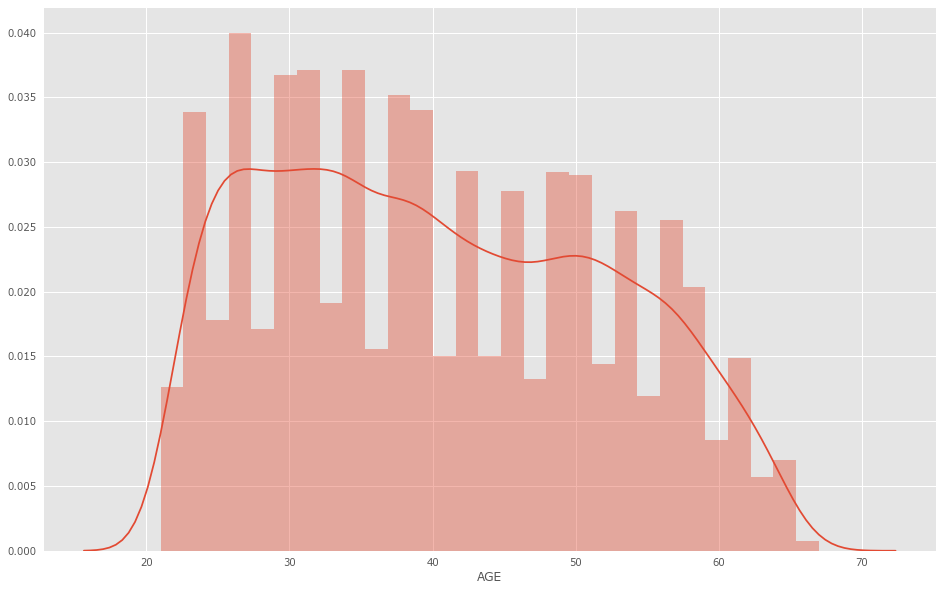

In [386]:
plt.subplots(figsize=(16, 10))

sns.distplot(data[num_columns[0]])

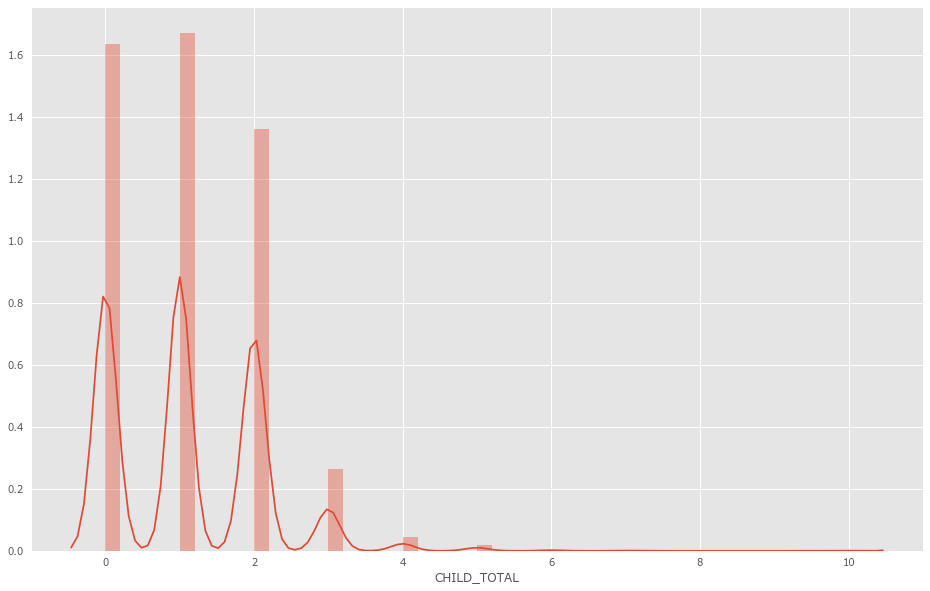

In [387]:
plt.subplots(figsize=(16, 10))

sns.distplot(data[num_columns[1]])

In [388]:
data['CHILD_TOTAL'].value_counts()

1     5087
0     4984
2     4140
3      799
4      133
5       59
6       12
7        5
10       3
8        1
Name: CHILD_TOTAL, dtype: int64

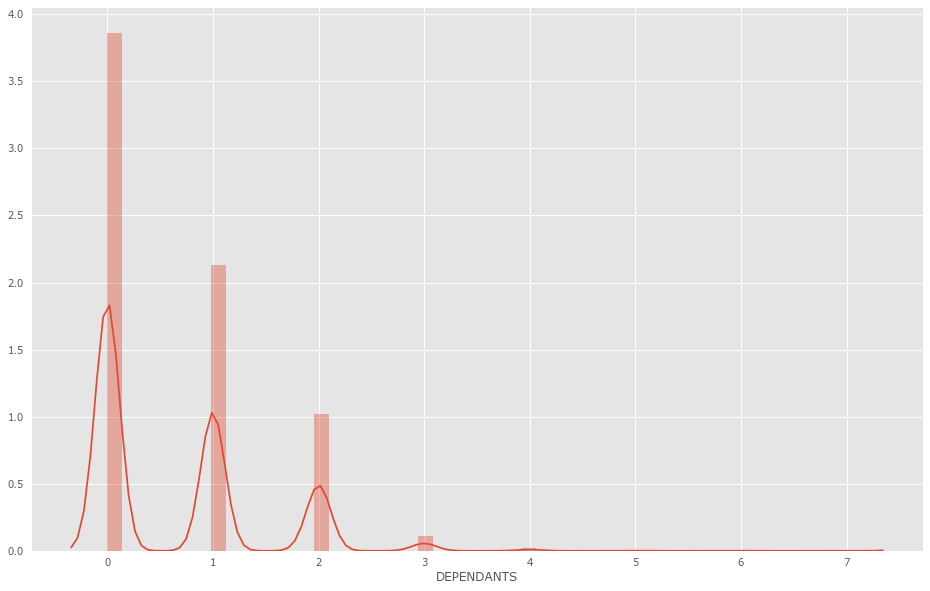

In [389]:
plt.subplots(figsize=(16, 10))

sns.distplot(data[num_columns[2]])

In [390]:
data[num_columns[2]].value_counts()

0    8226
1    4535
2    2167
3     243
4      42
5       5
6       4
7       1
Name: DEPENDANTS, dtype: int64

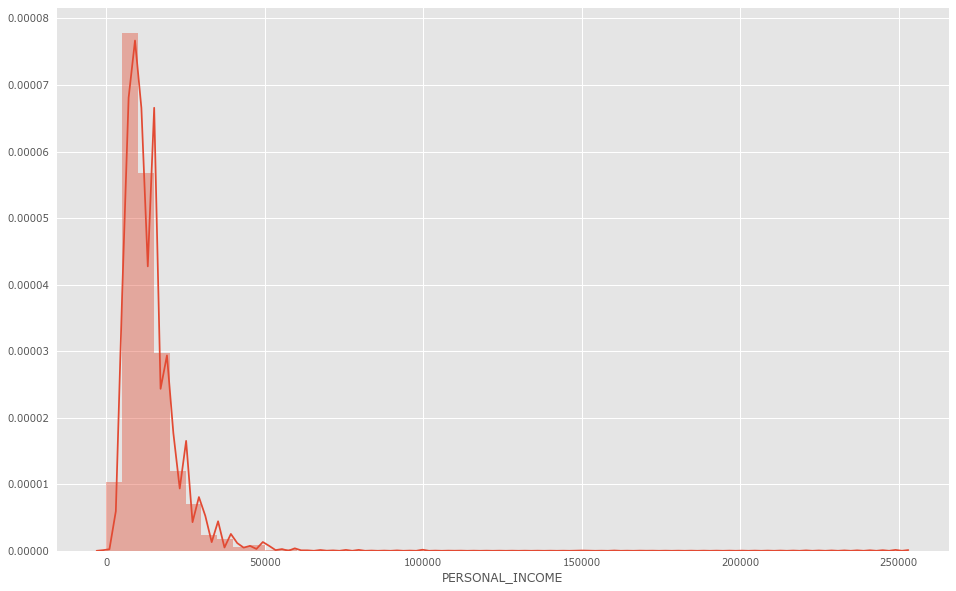

In [391]:
plt.subplots(figsize=(16, 10))

sns.distplot(data[num_columns[3]])

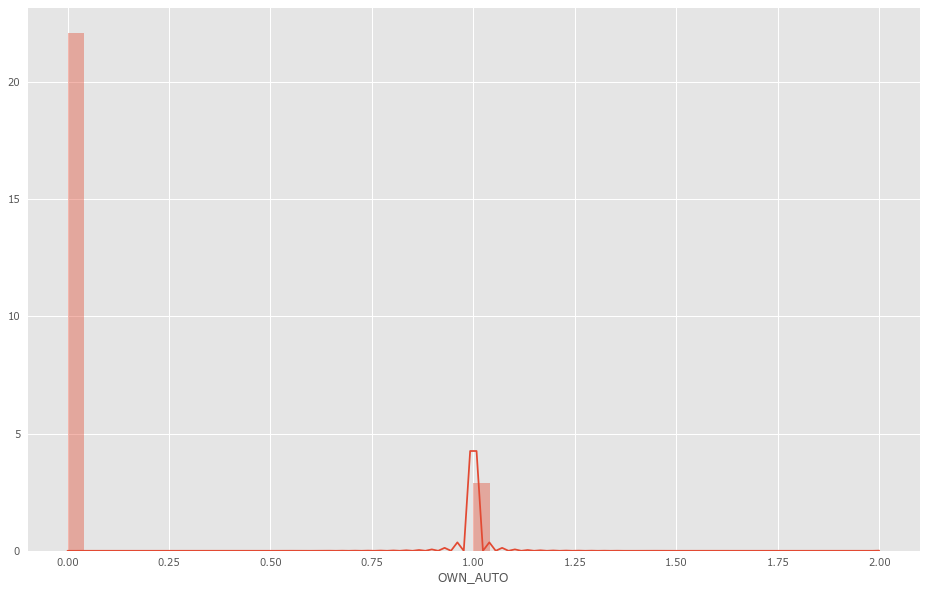

In [392]:
plt.subplots(figsize=(16, 10))

sns.distplot(data[num_columns[4]])

In [393]:
data[num_columns[4]].value_counts()

0    13453
1     1769
2        1
Name: OWN_AUTO, dtype: int64

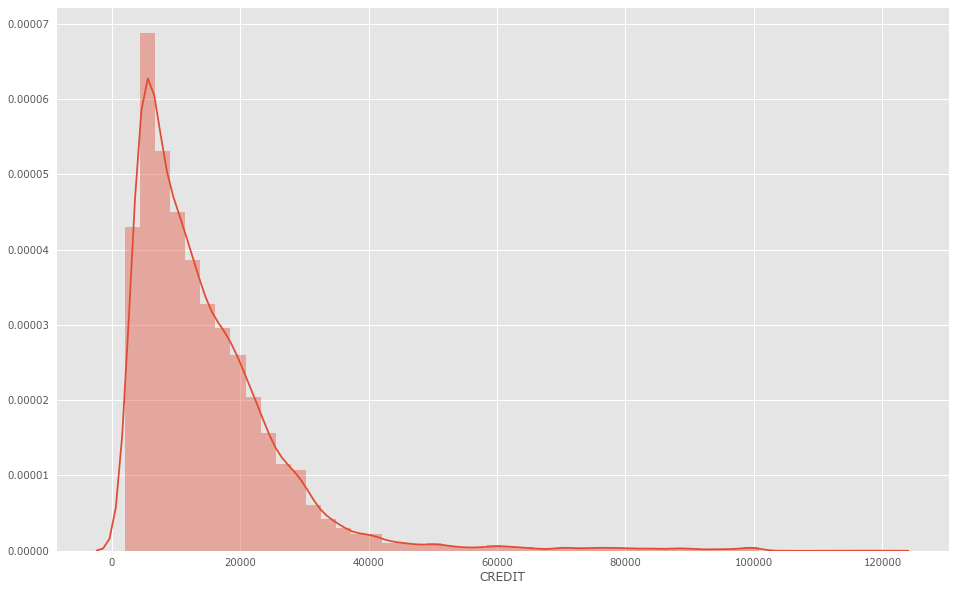

In [394]:
plt.subplots(figsize=(16, 10))

sns.distplot(data[num_columns[5]])

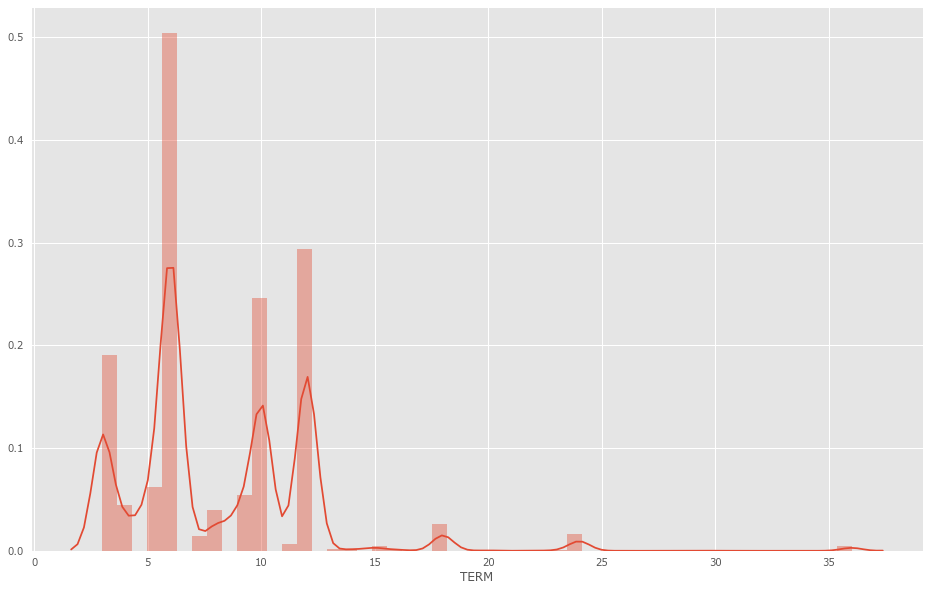

In [395]:
plt.subplots(figsize=(16, 10))

sns.distplot(data[num_columns[6]])

In [396]:
data[num_columns[6]].value_counts()

6     5063
12    2951
10    2473
3     1919
5      626
9      542
4      446
8      401
18     263
24     166
7      143
11      63
36      50
15      49
14      20
13      17
16      15
20       6
23       4
22       3
30       2
19       1
Name: TERM, dtype: int64

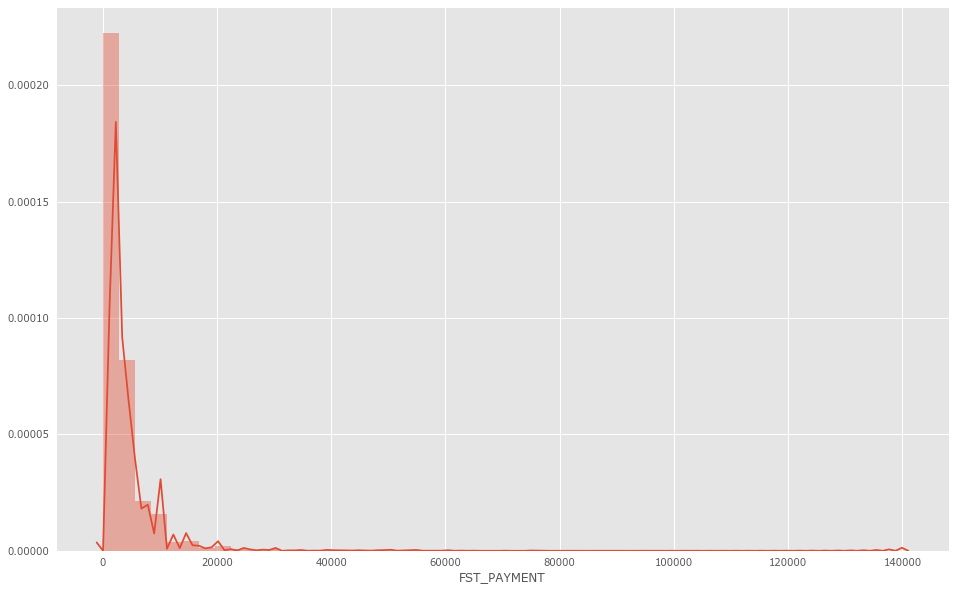

In [397]:
plt.subplots(figsize=(16, 10))

sns.distplot(data[num_columns[7]])

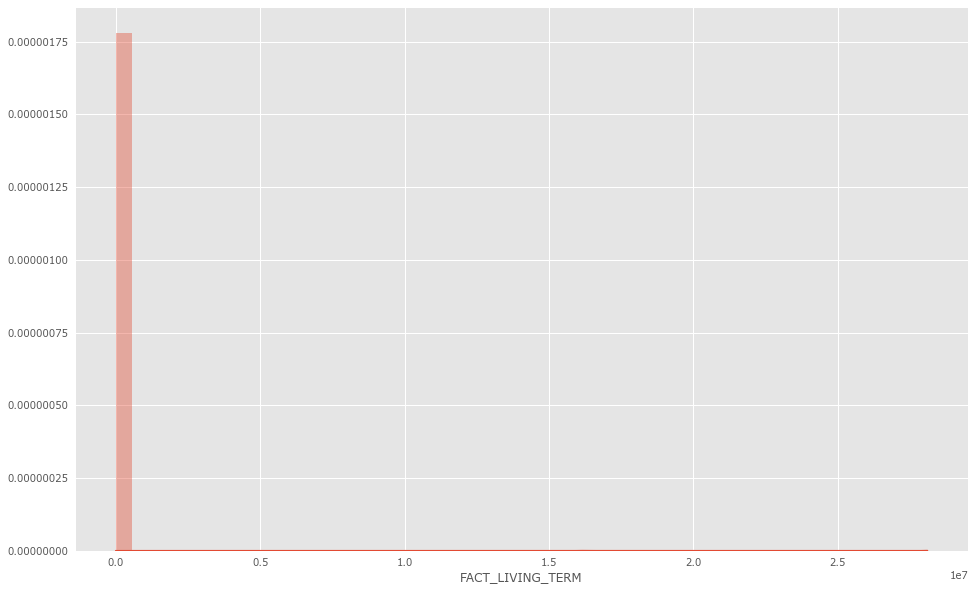

In [398]:
plt.subplots(figsize=(16, 10))

sns.distplot(data[num_columns[8]])

In [399]:
data[num_columns[8]].value_counts()

 36       596
 24       591
 12       498
 60       495
 48       472
 120      470
 72       425
 84       423
 96       416
 108      409
 240      317
 180      273
 156      261
 144      253
 132      251
 168      240
 216      210
 204      208
 192      206
 252      204
 228      191
 6        188
 264      184
 300      178
 276      148
 1        144
 288      127
 18       127
 3        123
 360      115
         ... 
 542        1
 494        1
 410        1
 430        1
 406        1
 390        1
 427        1
 435        1
 443        1
 459        1
 424        1
 440        1
 560        1
 648        1
 672        1
 680        1
 1000       1
 2000       1
 10220      1
 6534       1
 405        1
 429        1
 445        1
 669        1
 3228       1
 3612       1
-26         1
 23916      1
 7200       1
 1831       1
Name: FACT_LIVING_TERM, Length: 483, dtype: int64

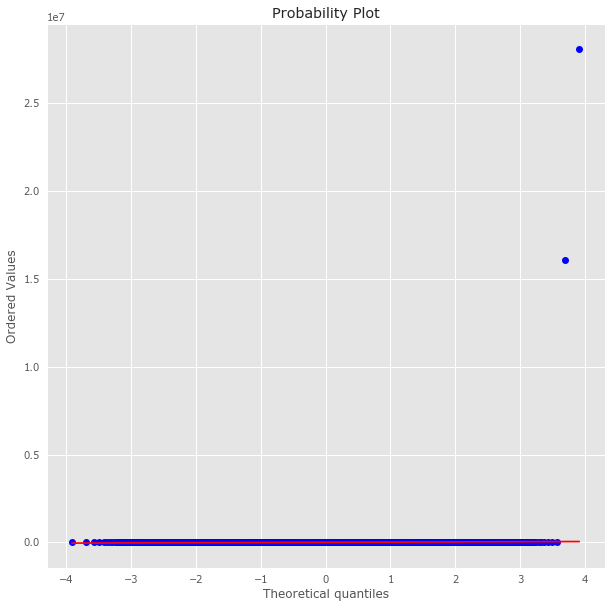

In [400]:
## QQ Plot
plt.subplots(figsize=(10, 10))

stats.probplot(data['FACT_LIVING_TERM'].dropna().sort_values(), dist="norm", plot=plt)
plt.show()

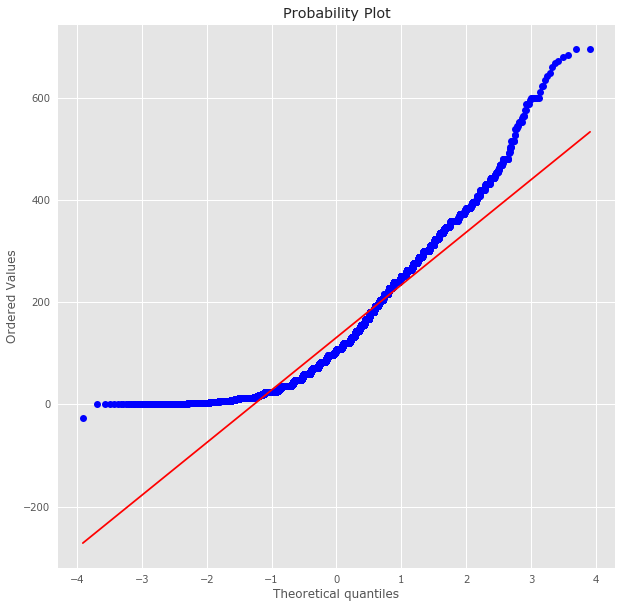

In [401]:
## QQ Plot
plt.subplots(figsize=(10, 10))

stats.probplot(data['FACT_LIVING_TERM'].dropna().sort_values()[:heu_const_work_time], dist="norm", plot=plt)
plt.show()

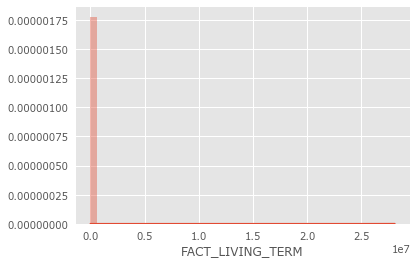

In [402]:
sns.distplot(data['FACT_LIVING_TERM'].dropna().sort_values())

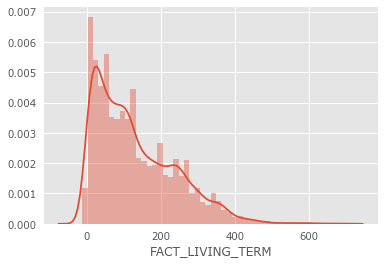

In [403]:
sns.distplot(data['FACT_LIVING_TERM'].dropna().sort_values()[:heu_const_work_time])

In [404]:
data[data['FACT_LIVING_TERM'] < 0]

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,OWN_AUTO,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,CREDIT,TERM,FST_PAYMENT,GPF_DOCUMENT_FL,FACT_LIVING_TERM,WORK_TIME,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,SOLVENCY
6246,0,56,1,0,1,0,0,Высшее,Состою в браке,Строительство,Высококвалифиц. специалист,Частная компания,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,23000.0000,Приморский край,Приморский край,Приморский край,Приморский край,ДАЛЬНЕВОСТОЧНЫЙ,1,1,1,1,1,1,0,0,0,1,0,0,98136.0000,24,40664.0000,1,-26,288.0000,1,0,1,1,0,4,0,0,0.0000,0.0000,0.0000,5.6248


In [405]:
data.at[data['FACT_LIVING_TERM'] < 0, 'FACT_LIVING_TERM'] = 0

In [406]:
maxy = max(data['FACT_LIVING_TERM'].sort_values()[:heu_const_work_time])

In [407]:
len(data['FACT_LIVING_TERM'].dropna())

15223

In [408]:
data.at[data['FACT_LIVING_TERM'] > maxy, 'FACT_LIVING_TERM'] = np.NaN
len(data['FACT_LIVING_TERM'].dropna())
# стало не слишком больше пропущенных значений

15200

In [409]:
len(data['FACT_LIVING_TERM'].dropna())

15200

median


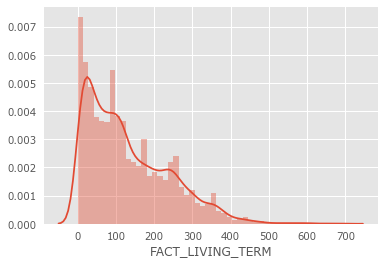

In [410]:
print('median')
sns.distplot(data['FACT_LIVING_TERM'].fillna(data[data['FACT_LIVING_TERM'] != 0]['FACT_LIVING_TERM'].dropna().sort_values()[:heu_const_work_time].median()))

In [411]:
true_median = data[data['FACT_LIVING_TERM'] != 0]['FACT_LIVING_TERM'].dropna().sort_values()[:heu_const_work_time].median()
data['FACT_LIVING_TERM'].fillna(true_median, inplace=True)

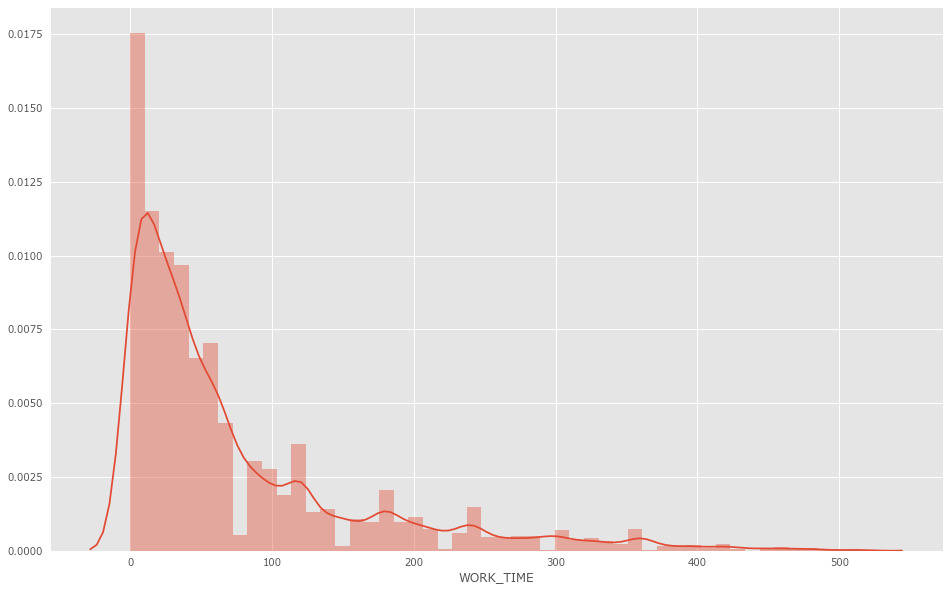

In [412]:
plt.subplots(figsize=(16, 10))

sns.distplot(data[num_columns[9]])

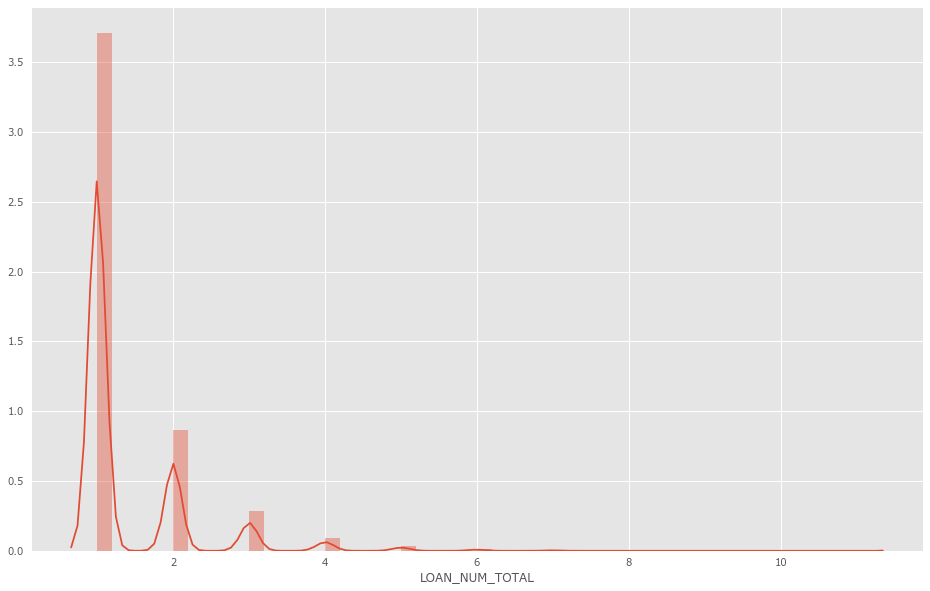

In [413]:
plt.subplots(figsize=(16, 10))

sns.distplot(data[num_columns[10]])

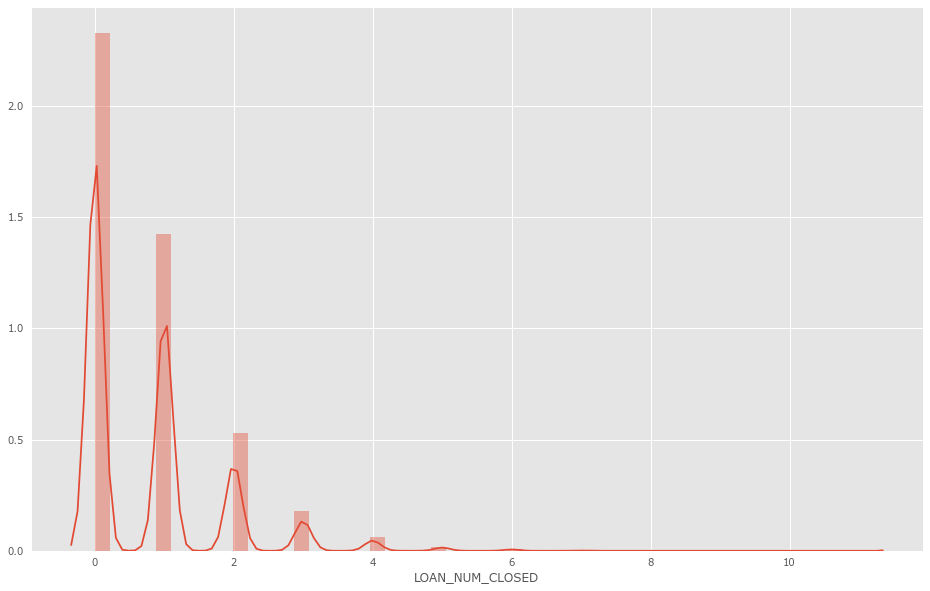

In [414]:
plt.subplots(figsize=(16, 10))

sns.distplot(data[num_columns[11]])

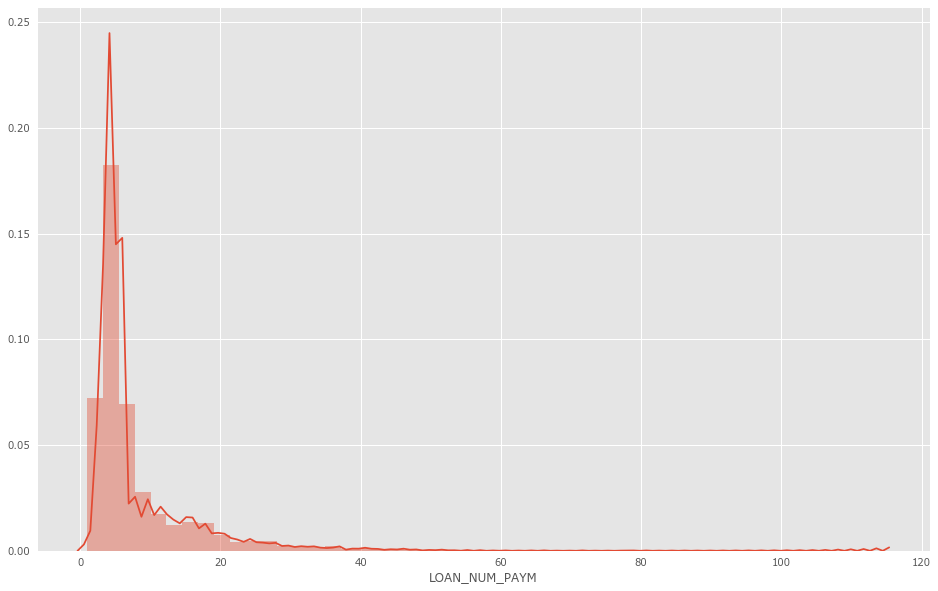

In [415]:
plt.subplots(figsize=(16, 10))

sns.distplot(data[num_columns[12]])

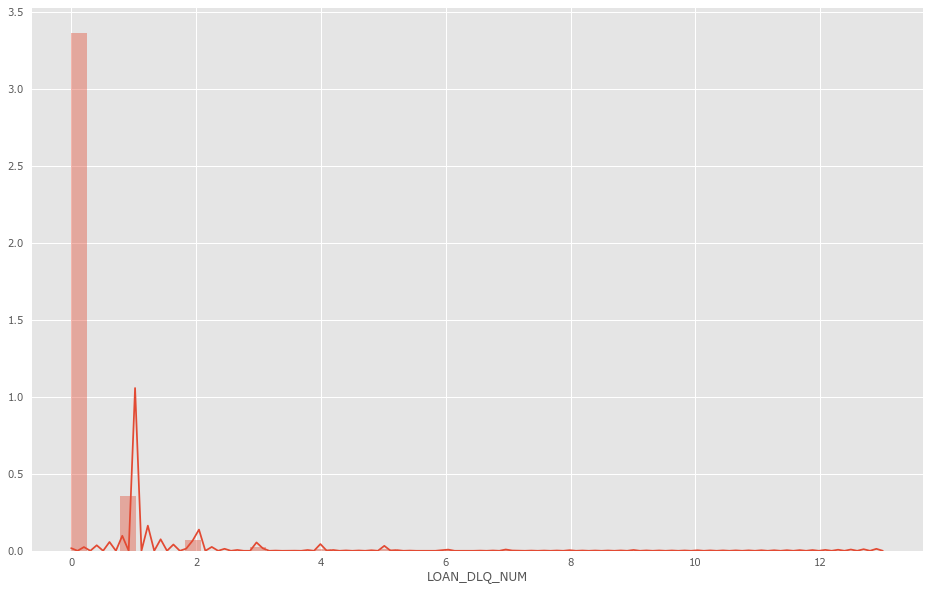

In [416]:
plt.subplots(figsize=(16, 10))

sns.distplot(data[num_columns[13]])

In [417]:
data[num_columns[13]].value_counts()

0     13301
1      1416
2       280
3        96
4        48
5        39
6        16
7        14
9         4
8         3
13        2
10        2
12        1
11        1
Name: LOAN_DLQ_NUM, dtype: int64

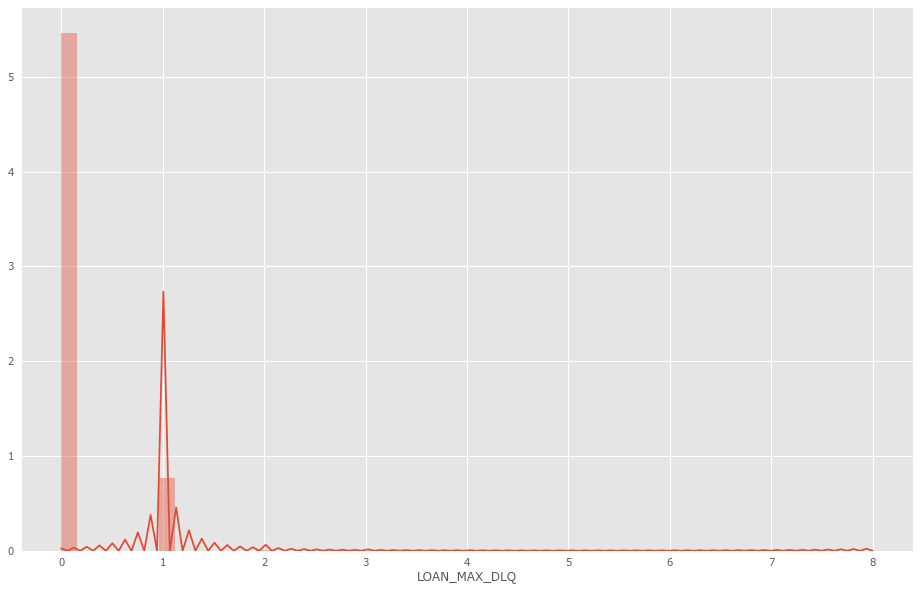

In [418]:
plt.subplots(figsize=(16, 10))

sns.distplot(data[num_columns[14]])

In [419]:
data[num_columns[14]].value_counts()

0    13301
1     1881
2       31
3        7
6        1
4        1
8        1
Name: LOAN_MAX_DLQ, dtype: int64

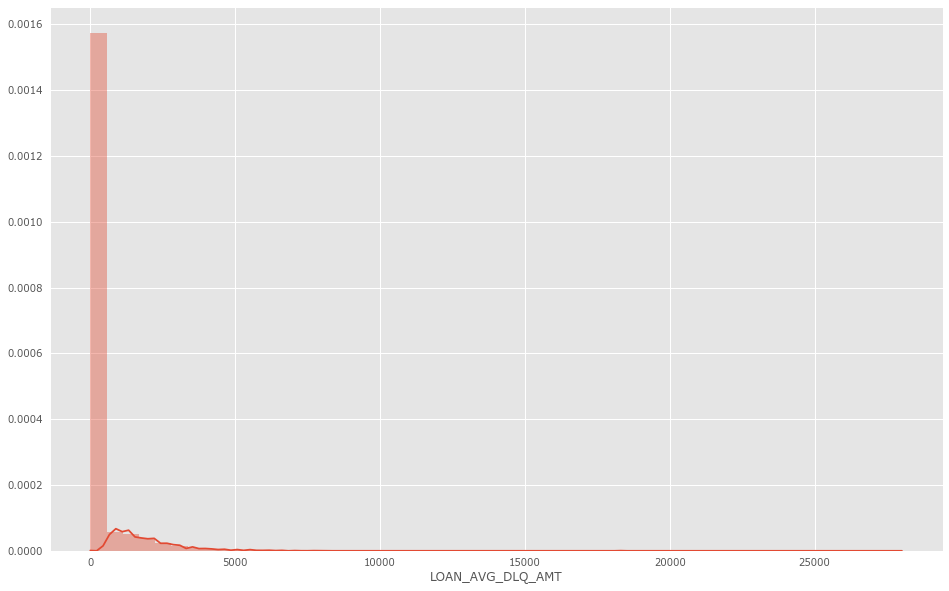

In [420]:
plt.subplots(figsize=(16, 10))

sns.distplot(data[num_columns[15]])

In [421]:
data[num_columns[15]].value_counts()

0.0000        13301
840.0000         10
1240.0000        10
1120.0000         9
910.0000          9
1480.0000         9
730.0000          9
1100.0000         8
1910.0000         8
1440.0000         8
2200.0000         8
1530.0000         8
1340.0000         8
1150.0000         8
830.0000          8
870.0000          8
880.0000          8
1310.0000         8
1410.0000         7
1260.0000         7
1810.0000         7
2020.0000         7
1380.0000         7
1550.0000         7
1630.0000         7
980.0000          7
1160.0000         7
1900.0000         7
1030.0000         7
1720.0000         7
              ...  
4884.9500         1
4300.0000         1
1768.0700         1
2186.5850         1
5850.0000         1
3820.0000         1
3589.0900         1
1033.0000         1
2127.1000         1
682.5600          1
1833.7700         1
2585.0000         1
2910.2500         1
550.0000          1
3283.1000         1
6500.0000         1
87.3900           1
2554.0050         1
2005.1500         1


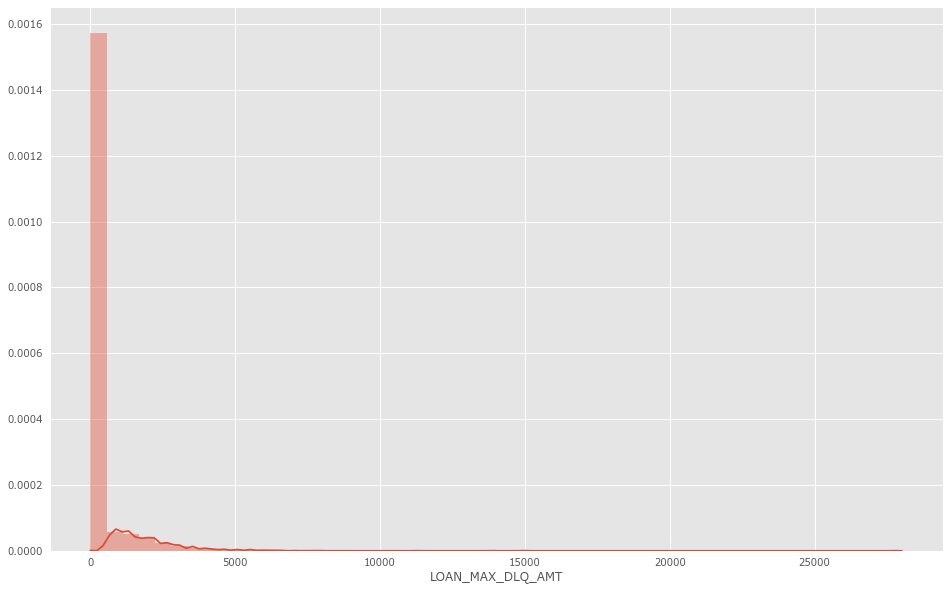

In [422]:
plt.subplots(figsize=(16, 10))

sns.distplot(data[num_columns[16]])

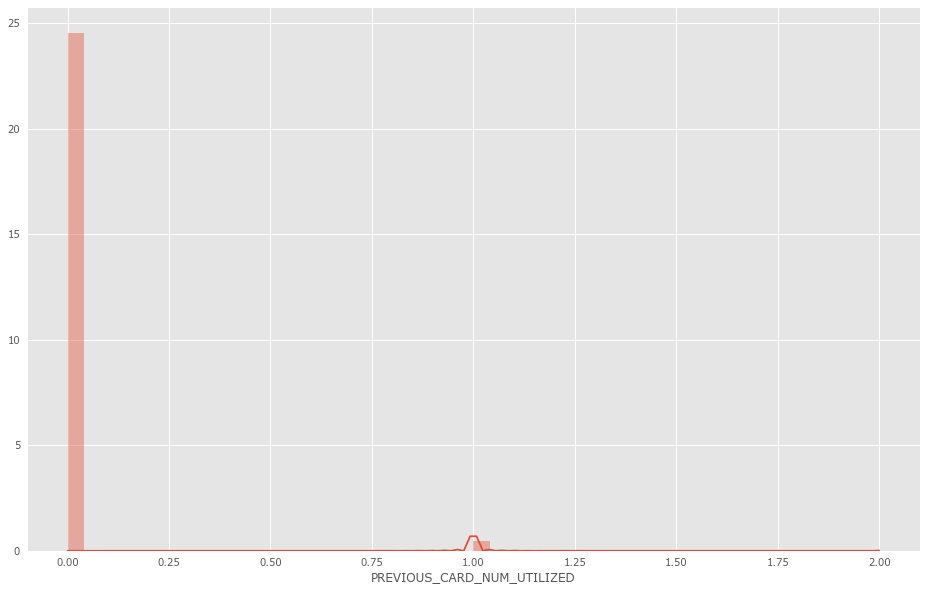

In [423]:
plt.subplots(figsize=(16, 10))

sns.distplot(data[num_columns[17]])

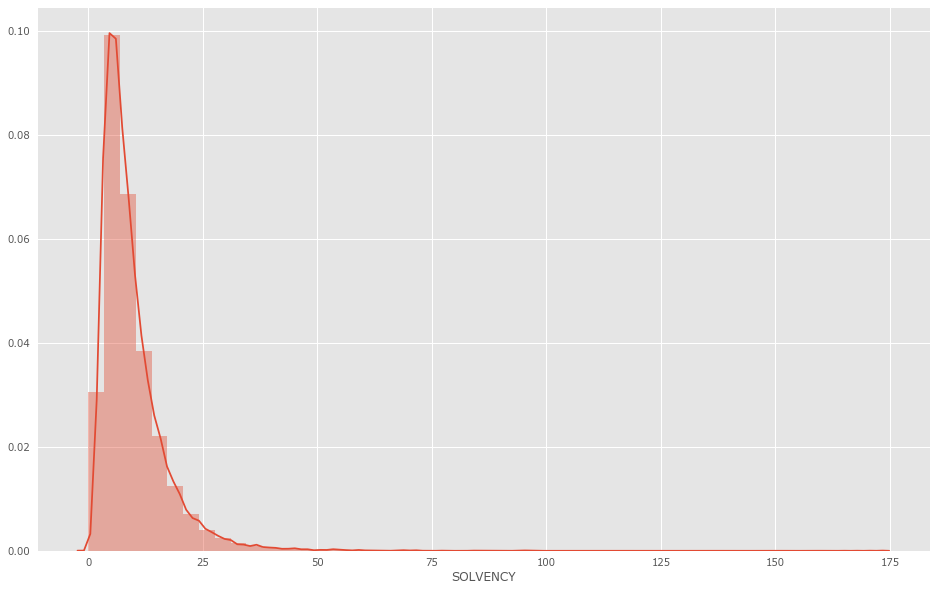

In [424]:
plt.subplots(figsize=(16, 10))

sns.distplot(data[num_columns[18]])

# Матрица корреляции

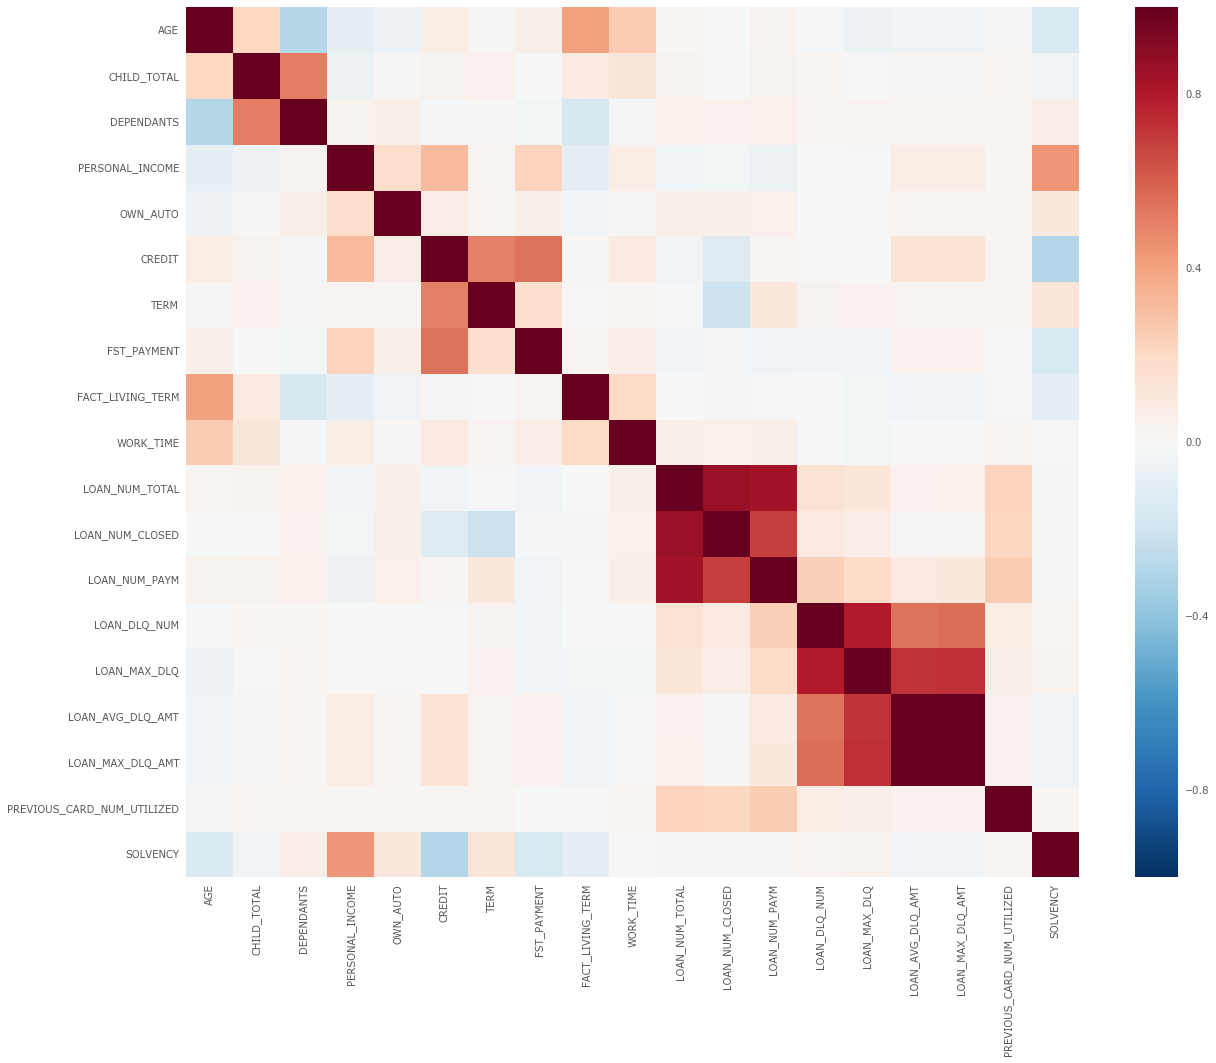

In [425]:
plt.subplots(figsize=(20, 16))

sns.heatmap(data.corr())

# Датасет для лог регрессии
Устраняем мультиколлениарность

In [426]:
data_log_reg = data.copy()

In [427]:

data['REG_ADDRESS_PROVINCE'] = data['REG_ADDRESS_PROVINCE'].map(data['REG_ADDRESS_PROVINCE'].value_counts())
data['FACT_ADDRESS_PROVINCE'] = data['FACT_ADDRESS_PROVINCE'].map(data['FACT_ADDRESS_PROVINCE'].value_counts())

In [428]:
dum_data = pd.get_dummies(data)

In [429]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

In [430]:
X_train, X_test, y_train, y_test = train_test_split(dum_data.drop(['TARGET_0', 'TARGET_1'], axis=1), dum_data.loc[:, 'TARGET_1'],
                                                    test_size=0.3)

In [153]:
forest = RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [154]:
roc_auc_score(y_test, forest.predict_proba(X_test)[:, 1])

0.6753271834419633

In [140]:
folds = KFold(n_splits=10, shuffle=True, random_state=42)

In [165]:
# Отключаем предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# Создаем экземляр класса StratifiedKFold 
strat = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Создаем списки для сохранения правильности на обучающей и контрольной выборках
train_auc = []
test_auc = []

trees_grid = [5, 10, 25, 50, 100, 150, 200, 250, 300, 350, 400, 450]

# Строим модели с разным количеством деревьев
for ntrees in trees_grid:
    rf = RandomForestClassifier(n_estimators=ntrees, random_state=42, n_jobs=-1)
    temp_train_acc = []
    temp_test_acc = []
    rf.fit(X_train, y_train)
    print('N Trees', ntrees)
    print(roc_auc_score(y_train, rf.predict_proba(X_train)[:, 1]))
    print(roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))
    print()
    train_auc.append(roc_auc_score(y, rf.predict_proba(X)[:, 1]))
    test_auc.append(roc_auc_score(ytest, rf.predict_proba(Xtest)[:, 1]))

# Преобразуем списки в массивы NumPy
# train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)

N Trees 5
0.991061650713
0.5718208703

N Trees 10
0.999766262069
0.596529112716

N Trees 25
0.999999958506
0.643621275463

N Trees 50
1.0
0.66274582864

N Trees 100
1.0
0.672136739109

N Trees 150
1.0
0.675865863492

N Trees 200
1.0
0.672282347384

N Trees 250
1.0
0.674023060211

N Trees 300
1.0
0.672084282492

N Trees 350
1.0
0.672245416044

N Trees 400
1.0
0.673455681922

N Trees 450
1.0
0.673873453



In [168]:
train_auc = np.array(train_auc)
test_auc = np.array(test_auc)

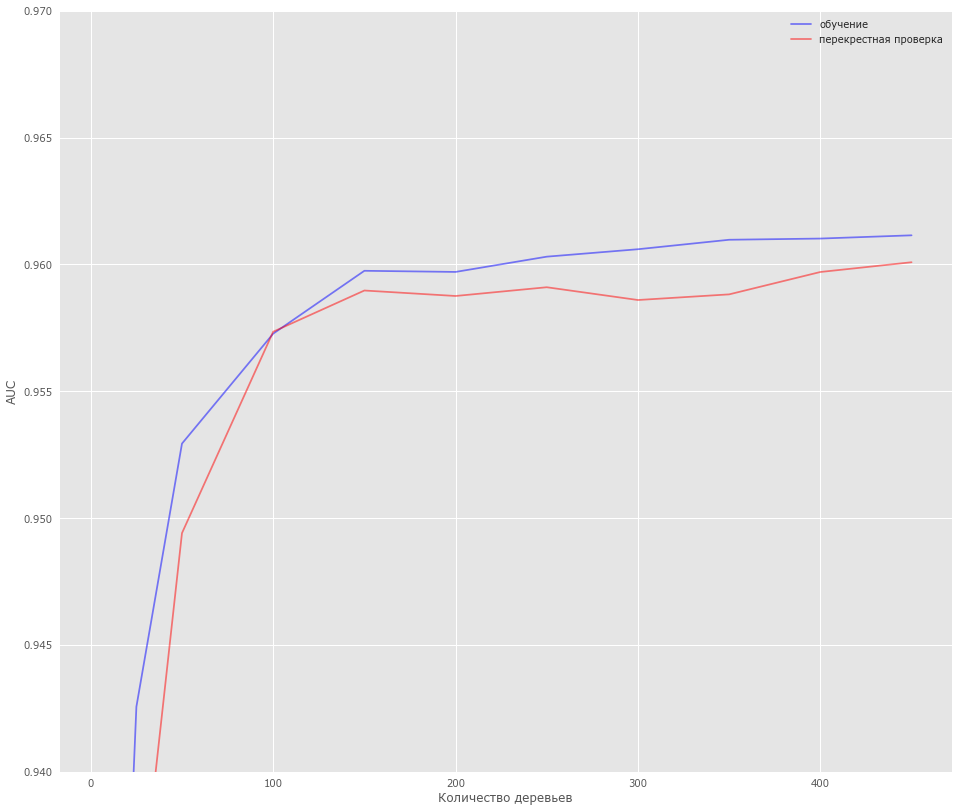

In [187]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(16, 14))
ax.plot(trees_grid, train_auc, alpha=0.5, color='blue', label='обучение')
ax.plot(trees_grid, test_auc, alpha=0.5, color='red', label='перекрестная проверка')
# ax.fill_between(trees_grid, test_auc.mean(axis=1) - test_auc.std(axis=1), test_auc.mean(axis=1) + test_auc.std(axis=1), color='#888888', alpha=0.4)
# ax.fill_between(trees_grid, test_auc.mean(axis=1) - 2*test_auc.std(axis=1), test_auc.mean(axis=1) + 2*test_auc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.94,0.97])
ax.set_ylabel("AUC")
ax.set_xlabel("Количество деревьев")

In [188]:
params = {'max_features': [9, 12, 15, 18, 21, 24, 27, 30, 33, 37, 40, 43], 'max_depth': [3, 4, 5, 7, 9, 12, 15]}

In [192]:
rf = RandomForestClassifier(n_estimators=500, random_state=42)
grid_search = GridSearchCV(rf, params, n_jobs=-1, cv=strat, scoring='roc_auc', verbose=True)

In [193]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 84 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed: 22.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [9, 12, 15, 18, 21, 24, 27, 30, 33, 37, 40, 43], 'max_depth': [3, 4, 5, 7, 9, 12, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=True)

In [194]:
grid_search.best_score_

0.68416213979619356

In [195]:
grid_search.best_params_

{'max_depth': 12, 'max_features': 30}

In [199]:
cv_result = DataFrame(grid_search.cv_results_)

In [200]:
cv_result.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_features,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,split5_test_score,split5_train_score,split6_test_score,split6_train_score,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,2.4103,0.1092,0.6707,0.7160,3,9,"{'max_depth': 3, 'max_features': 9}",81,0.6645,0.7200,0.6518,0.7158,0.6907,0.7143,0.6990,0.7141,0.6730,0.7196,0.6203,0.7164,0.6714,0.7155,0.6815,0.7156,0.6786,0.7141,0.6762,0.7148,0.0172,0.0064,0.0209,0.0020
1,2.9003,0.1178,0.6738,0.7160,3,12,"{'max_depth': 3, 'max_features': 12}",71,0.6642,0.7206,0.6525,0.7170,0.6985,0.7144,0.6973,0.7153,0.6713,0.7155,0.6241,0.7161,0.6778,0.7170,0.6846,0.7142,0.6906,0.7146,0.6769,0.7153,0.3118,0.0083,0.0215,0.0018
2,3.5632,0.1190,0.6715,0.7153,3,15,"{'max_depth': 3, 'max_features': 15}",76,0.6697,0.7172,0.6505,0.7179,0.6930,0.7115,0.6984,0.7184,0.6708,0.7172,0.6158,0.7145,0.6734,0.7155,0.6791,0.7140,0.6840,0.7122,0.6802,0.7150,0.0857,0.0130,0.0224,0.0022
3,3.8523,0.1223,0.6724,0.7135,3,18,"{'max_depth': 3, 'max_features': 18}",74,0.6636,0.7181,0.6550,0.7142,0.6963,0.7110,0.6959,0.7175,0.6715,0.7132,0.6227,0.7137,0.6710,0.7116,0.6874,0.7135,0.6873,0.7118,0.6736,0.7102,0.0844,0.0203,0.0210,0.0025
4,3.5654,0.1020,0.6711,0.7122,3,21,"{'max_depth': 3, 'max_features': 21}",78,0.6576,0.7162,0.6584,0.7150,0.7029,0.7100,0.6870,0.7129,0.6704,0.7136,0.6140,0.7124,0.6741,0.7104,0.6878,0.7116,0.6842,0.7105,0.6751,0.7096,0.1361,0.0092,0.0231,0.0021


In [201]:
grid_search.grid_scores_

[mean: 0.67068, std: 0.02086, params: {'max_depth': 3, 'max_features': 9},
 mean: 0.67378, std: 0.02148, params: {'max_depth': 3, 'max_features': 12},
 mean: 0.67147, std: 0.02243, params: {'max_depth': 3, 'max_features': 15},
 mean: 0.67242, std: 0.02104, params: {'max_depth': 3, 'max_features': 18},
 mean: 0.67114, std: 0.02313, params: {'max_depth': 3, 'max_features': 21},
 mean: 0.67087, std: 0.02402, params: {'max_depth': 3, 'max_features': 24},
 mean: 0.67263, std: 0.02461, params: {'max_depth': 3, 'max_features': 27},
 mean: 0.67013, std: 0.02418, params: {'max_depth': 3, 'max_features': 30},
 mean: 0.67017, std: 0.02310, params: {'max_depth': 3, 'max_features': 33},
 mean: 0.67100, std: 0.02346, params: {'max_depth': 3, 'max_features': 37},
 mean: 0.67142, std: 0.02370, params: {'max_depth': 3, 'max_features': 40},
 mean: 0.66832, std: 0.02313, params: {'max_depth': 3, 'max_features': 43},
 mean: 0.67194, std: 0.02002, params: {'max_depth': 4, 'max_features': 9},
 mean: 0.67522

{'max_depth': 12, 'max_features': 30}

In [435]:
forest = RandomForestClassifier(n_estimators=500, max_depth=12, max_features=30, n_jobs=-1)

In [436]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features=30, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [437]:
roc_auc_score(y_test, forest.predict_proba(X_test)[:, 1])

0.69989854772953575

In [311]:
data_old = data.copy()

# New data

In [446]:
data = pd.read_csv("data/Credit_OTP_new.csv", encoding='cp1251', sep = ';')
data.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,OWN_AUTO,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,CREDIT,TERM,FST_PAYMENT,DL_DOCUMENT_FL,GPF_DOCUMENT_FL,FACT_LIVING_TERM,WORK_TIME,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,75286343,1,39,1,0,1,1,1,Среднее специальное,Состою в браке,Металлургия/Промышленность/Машиностроение,Рабочий,Частная компания,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,15000,Челябинская область,Челябинская область,Челябинская область,Челябинская область,УРАЛЬСКИЙ,1,1,1,1,1,0,0,0,0,0,0,0,11980,12,0,0,1,132,120,0,0,1,1,0,3,0,0,0,0,nan
1,62806593,0,48,0,1,1,1,1,Среднее,Не состоял в браке,Пропуск,Пропуск,Пропуск,Пропуск,Пропуск,от 10000 до 20000 руб.,12000,Свердловская область,Свердловская область,Свердловская область,Свердловская область,УРАЛЬСКИЙ,1,1,1,1,1,1,0,0,0,0,0,0,5472,6,608,0,0,132,83,0,0,0,1,0,4,1,1,1050,1050,nan
2,66841260,0,36,1,0,1,0,2,Среднее,Состою в браке,Ресторанный бизнес/Общественное питание,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,7000,Краснодарский край,Краснодарский край,Краснодарский край,Краснодарский край,ЮЖНЫЙ,1,1,1,1,1,0,0,0,0,0,0,0,17990,6,5000,0,1,132,48,1,0,1,4,4,36,0,0,0,0,nan
3,60086225,0,38,1,0,0,1,0,Среднее специальное,Состою в браке,Торговля,Рабочий,Частная компания,Без участия,Вспомогательный техперсонал,от 20000 до 50000 руб.,20000,Архангельская область,Архангельская область,Архангельская область,Архангельская область,СЕВЕРО-ЗАПАДНЫЙ,1,1,1,1,1,1,1,0,0,0,0,0,7190,9,1800,0,0,132,143,1,0,1,1,0,6,0,0,0,0,nan
4,74187778,0,58,0,1,1,1,0,Среднее,Состою в браке,Пропуск,Пропуск,Пропуск,Пропуск,Пропуск,от 20000 до 50000 руб.,5750,Воронежская область,Воронежская область,Воронежская область,Воронежская область,ЦЕНТРАЛЬНЫЙ 2,1,1,1,1,1,1,1,1,0,0,0,0,13590,10,2000,0,0,132,83,1,0,0,1,1,10,0,0,0,0,nan


In [447]:
data['PREVIOUS_CARD_NUM_UTILIZED'] = data['PREVIOUS_CARD_NUM_UTILIZED'].replace(data['PREVIOUS_CARD_NUM_UTILIZED'][0], 0)

data.drop('AGREEMENT_RK', axis=1, inplace=True)

for i in categorical_columns:
    if i in data.columns:
        data[i]=data[i].astype('str')

data.drop('DL_DOCUMENT_FL', axis=1, inplace=True)
data.at[(data['GEN_INDUSTRY'] == 'nan') & (data['GEN_TITLE'] == 'nan'), 'WORK_TIME'] = 0

maxy = max(data['WORK_TIME'].sort_values()[:heu_const_work_time])
data.at[data['WORK_TIME'] > maxy, 'WORK_TIME'] = np.NaN
true_median = data[data['WORK_TIME'] != 0]['WORK_TIME'].dropna().sort_values()[:heu_const_work_time].median()
data['WORK_TIME'].fillna(true_median, inplace=True)

for i in ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']:
    if i in data.columns:
        data[i] = data[i].str.replace(',', '.').astype('float')
        
data.at[data['EDUCATION'] == 'Ученая степень', 'EDUCATION'] = 'Высшее'
data.at[data['EDUCATION'] == 'Два и более высших образования', 'EDUCATION'] = 'Высшее'

data.at[data['GEN_INDUSTRY'] == 'Маркетинг', 'GEN_INDUSTRY'] = 'СМИ/Реклама/PR-агенства'
small_categories_aggregation(column='GEN_INDUSTRY', n_samples=20, value='Другие сферы')
data.at[data['ORG_TP_STATE'] == 'Частная ком. с инос. капиталом', 'ORG_TP_STATE'] = 'Частная компания'

data.at[data['TP_PROVINCE'] == 'Кабардино-Балкария', 'TP_PROVINCE'] = 'Ставропольский край'

data.at[data['POSTAL_ADDRESS_PROVINCE'] == 'Эвенкийский АО', 'POSTAL_ADDRESS_PROVINCE'] = 'Красноярский край'
data.at[data['POSTAL_ADDRESS_PROVINCE'] == 'Агинский Бурятский АО', 'POSTAL_ADDRESS_PROVINCE'] = 'Красноярский край'
data.at[data['POSTAL_ADDRESS_PROVINCE'] == 'Усть-Ордынский Бурятский АО', 'POSTAL_ADDRESS_PROVINCE'] = 'Красноярский край'

data.at[data['FACT_ADDRESS_PROVINCE'] == 'Эвенкийский АО', 'FACT_ADDRESS_PROVINCE'] = 'Красноярский край'
data.at[data['FACT_ADDRESS_PROVINCE'] == 'Агинский Бурятский АО', 'FACT_ADDRESS_PROVINCE'] = 'Красноярский край'
data.at[data['FACT_ADDRESS_PROVINCE'] == 'Усть-Ордынский Бурятский АО', 'FACT_ADDRESS_PROVINCE'] = 'Красноярский край'
data.at[data['FACT_ADDRESS_PROVINCE'] == 'Дагестан', 'FACT_ADDRESS_PROVINCE'] = 'Северная Осетия'

data['REG_ADDRESS_PROVINCE'] = data['REG_ADDRESS_PROVINCE'].map(data['REG_ADDRESS_PROVINCE'].value_counts())
data['FACT_ADDRESS_PROVINCE'] = data['FACT_ADDRESS_PROVINCE'].map(data['FACT_ADDRESS_PROVINCE'].value_counts())

data.at[data['REGION_NM'] == 'nan', 'REGION_NM'] = 'ЮЖНЫЙ'

data['SOLVENCY'] = data['PERSONAL_INCOME']/(data['CREDIT']/data['TERM'])

data.at[data['FACT_LIVING_TERM'] < 0, 'FACT_LIVING_TERM'] = 0

maxy = max(data['FACT_LIVING_TERM'].sort_values()[:heu_const_work_time])

data.at[data['FACT_LIVING_TERM'] > maxy, 'FACT_LIVING_TERM'] = np.NaN
len(data['FACT_LIVING_TERM'].dropna())

true_median = data[data['FACT_LIVING_TERM'] != 0]['FACT_LIVING_TERM'].dropna().sort_values()[:heu_const_work_time].median()
data['FACT_LIVING_TERM'].fillna(true_median, inplace=True)

In [448]:
dum_data = pd.get_dummies(data)

In [449]:
X_train, X_test, y_train, y_test = train_test_split(dum_data.drop(['TARGET_0', 'TARGET_1'], axis=1), dum_data.loc[:, 'TARGET_1'],
                                                    test_size=0.3)

In [450]:
forest = RandomForestClassifier(n_estimators=500, max_depth=12, max_features=30, n_jobs=-1)

In [451]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features=30, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [452]:
roc_auc_score(y_test, forest.predict_proba(X_test)[:, 1])

0.68866939420707607